In [437]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale
import seaborn as sns
import matplotlib.pyplot as plt


# 한글출력
import matplotlib
import matplotlib.font_manager as fm

font_location = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font',family = font_name)

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import statsmodels.formula.api as smf



In [462]:
df_raw = pd.read_csv('BOSTON_HOUSING.csv', encoding = 'cp949')

In [3]:
df_raw

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.400000,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67
502,20.600000,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08
503,23.900000,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64
504,22.000000,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48


In [4]:
df_raw.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000
50%,21.200001,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999
max,50.000000,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001


In [6]:
df_raw.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

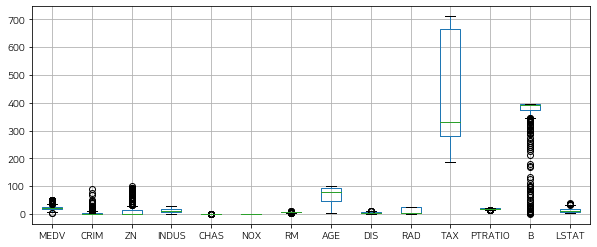

In [10]:
df_raw.boxplot(figsize = (10,4))

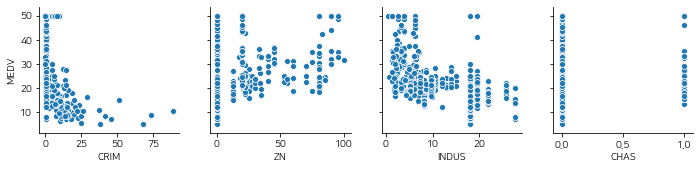

In [11]:
sns.pairplot(df_raw, y_vars = ['MEDV'], x_vars = ['CRIM','ZN','INDUS','CHAS'])

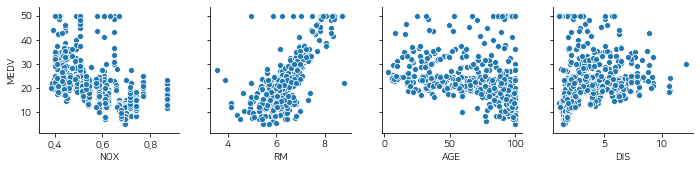

In [13]:
sns.pairplot(df_raw, y_vars = ['MEDV'], x_vars = ['NOX','RM','AGE','DIS'])

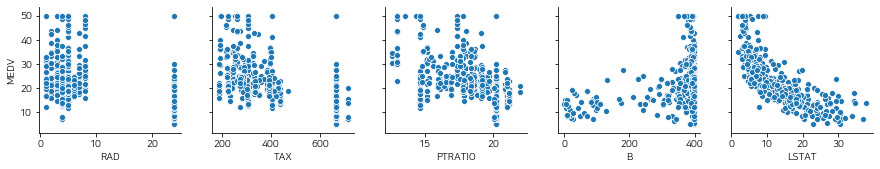

In [15]:
sns.pairplot(df_raw, y_vars = ['MEDV'], x_vars = ['RAD','TAX','PTRATIO','B','LSTAT'])

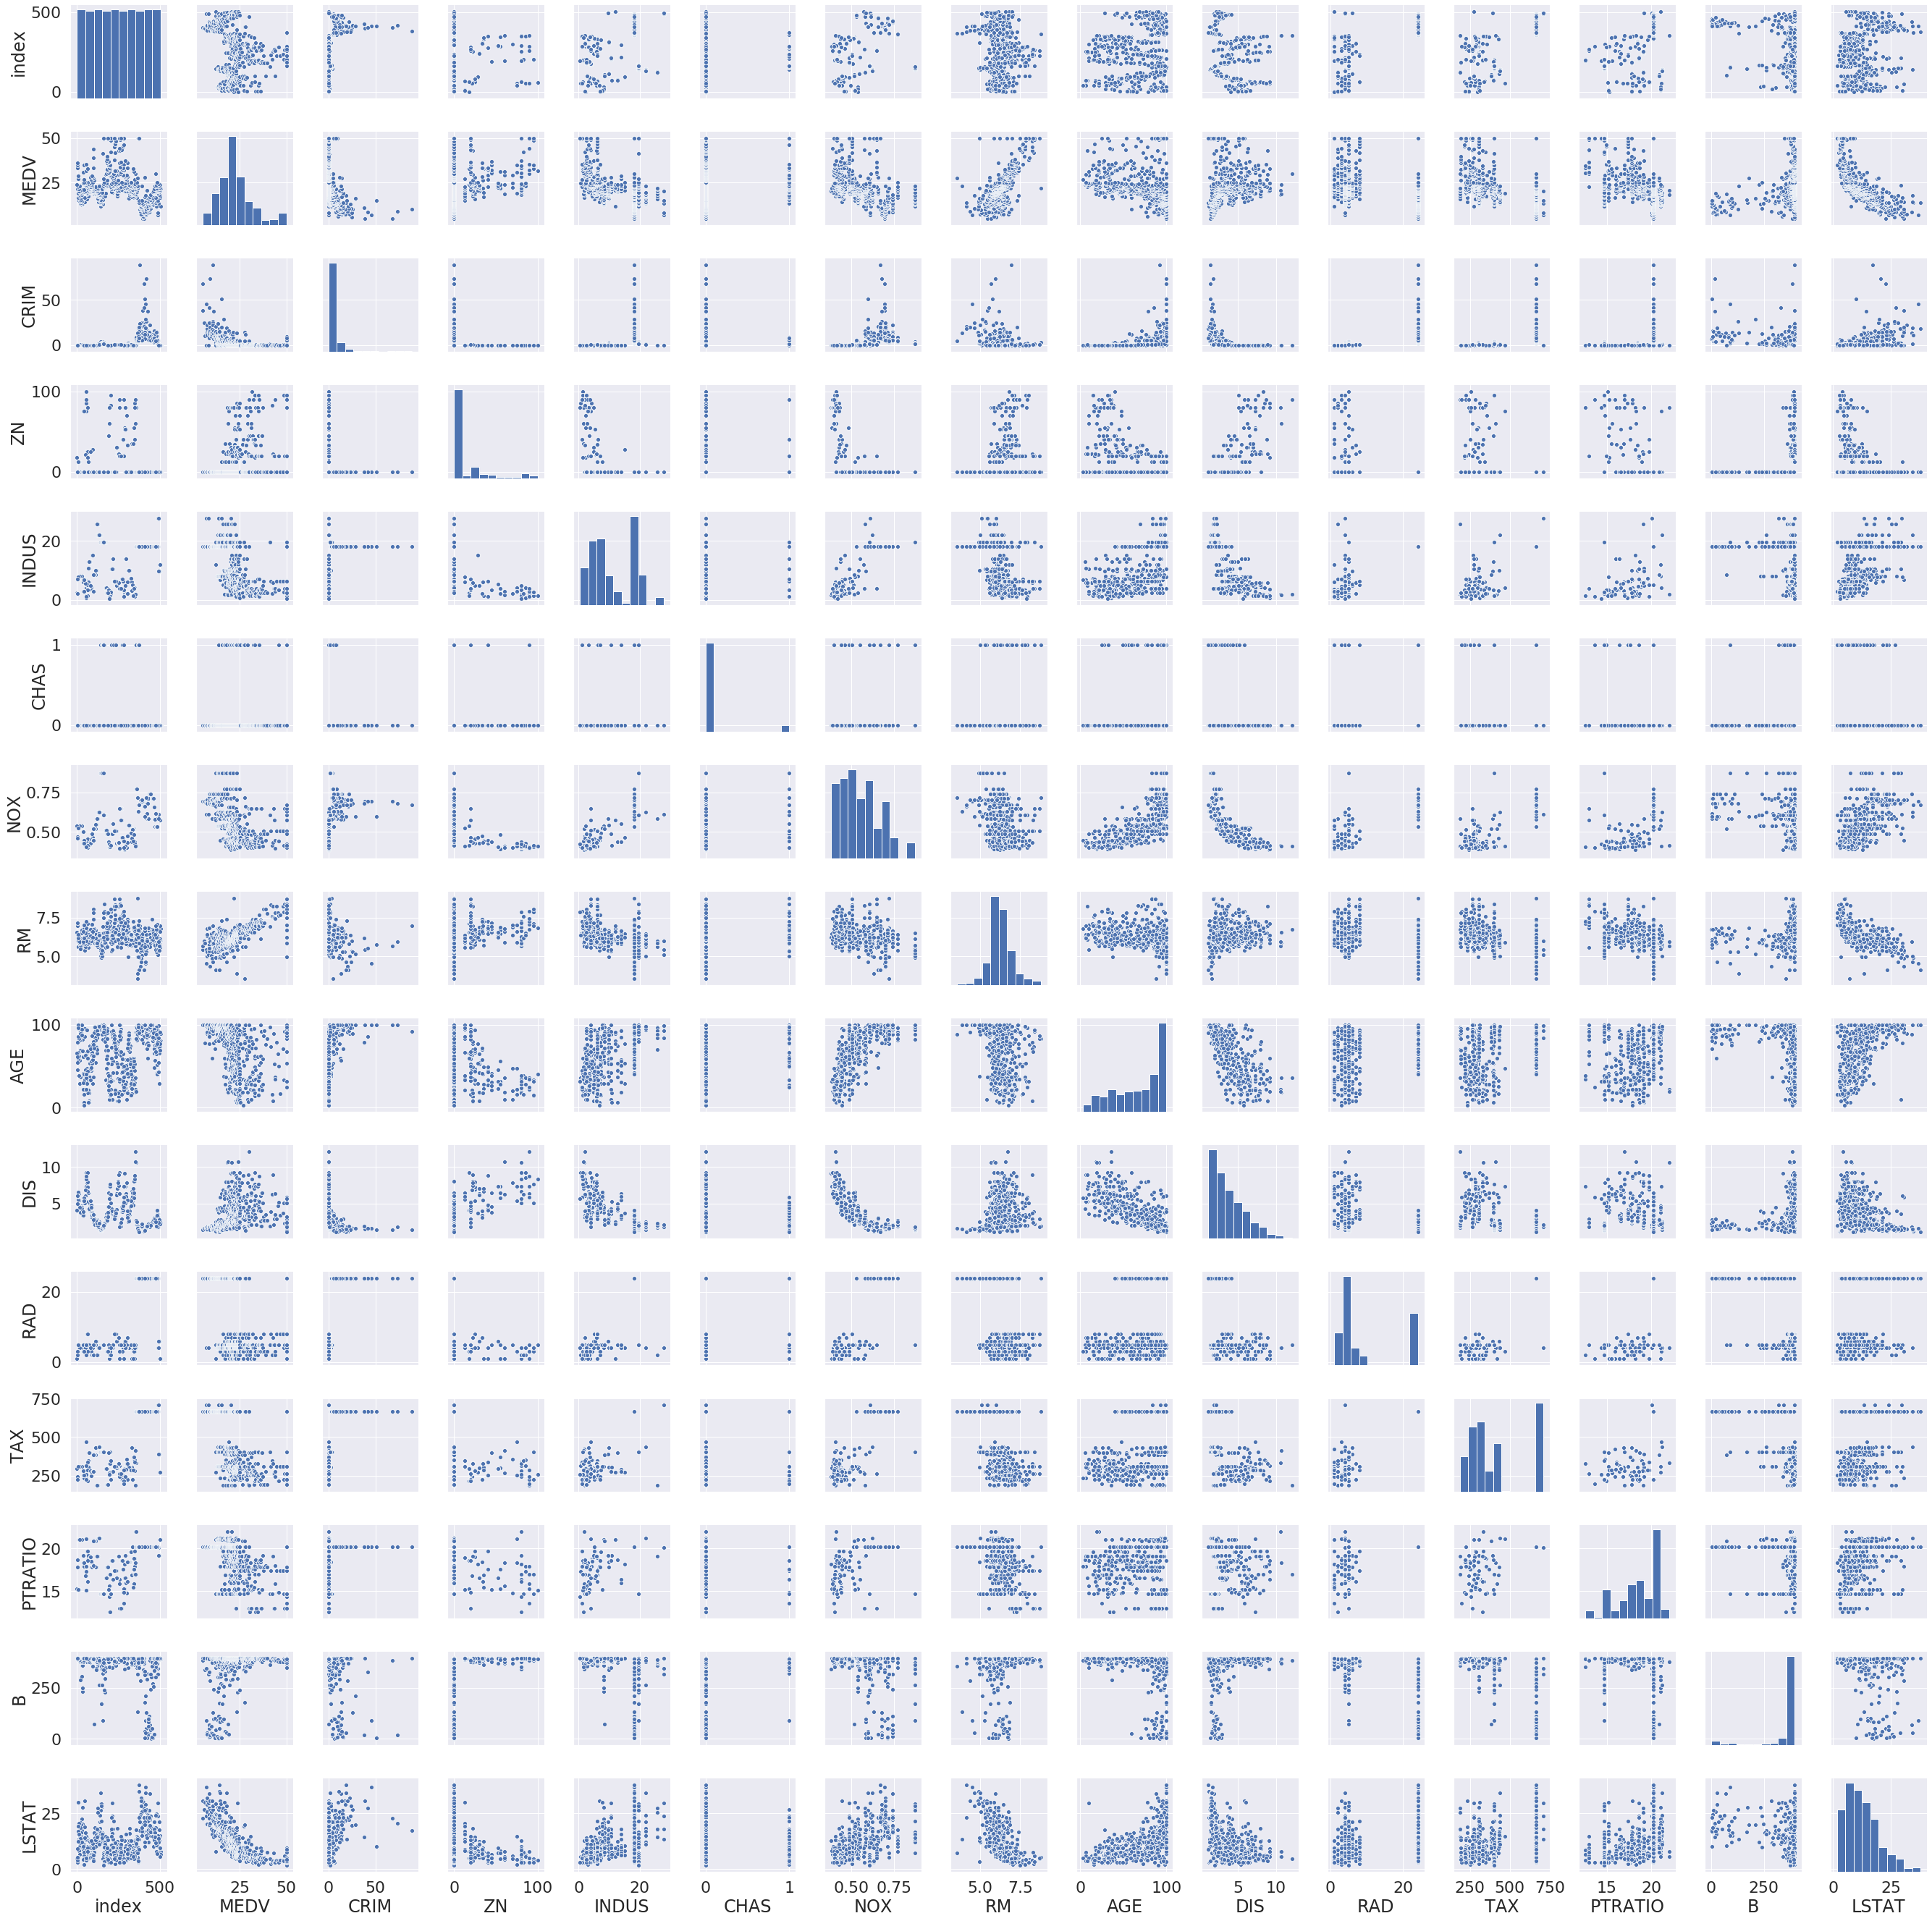

In [171]:
sns.set(font_scale = 2)
sns.pairplot(df_raw)

In [17]:
import pandas_profiling as pp
pp.ProfileReport(df_raw)

## 강조망(CHAS)

In [18]:
df_chas_0 = df_raw[df_raw['CHAS'] == 0]
df_chas_1 = df_raw[df_raw['CHAS'] == 1]


In [19]:
df_chas_0

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.400000,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67
502,20.600000,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08
503,23.900000,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64
504,22.000000,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48


In [21]:
df_chas_1

35

In [26]:
df_chas = df_raw.groupby('CHAS')['MEDV'].mean()

In [27]:
df_chas

CHAS
0    22.093843
1    28.440000
Name: MEDV, dtype: float64

In [29]:
df_chas_0['MEDV'].sort_values(ascending = False)

161    50.0
257    50.0
166    50.0
186    50.0
195    50.0
       ... 
414     7.0
399     6.3
400     5.6
405     5.0
398     5.0
Name: MEDV, Length: 471, dtype: float64

In [30]:
df_chas_1['MEDV'].sort_values(ascending = False)

372    50.000000
369    50.000000
162    50.000000
163    50.000000
370    50.000000
283    50.000000
282    46.000000
273    35.200001
276    33.200001
277    33.099998
274    32.400002
234    29.000000
222    27.500000
160    27.000000
220    26.700001
236    25.100000
208    24.400000
216    23.299999
219    23.000000
358    22.700001
212    22.400000
364    21.900000
357    21.700001
221    21.700001
210    21.700001
218    21.500000
269    20.700001
209    20.000000
211    19.299999
356    17.799999
154    17.000000
363    16.799999
155    15.600000
152    15.300000
142    13.400000
Name: MEDV, dtype: float64

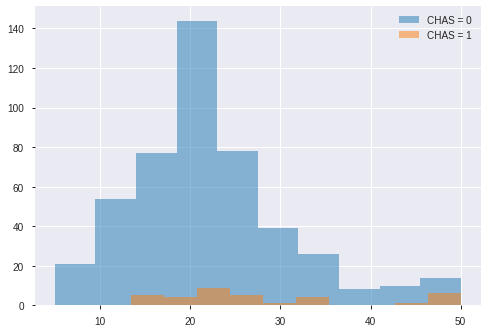

In [69]:
plt.hist(df_raw[df_raw['CHAS'] == 0]['MEDV'], label = "CHAS = 0", alpha = 0.5)
plt.hist(df_raw[df_raw['CHAS'] == 1]['MEDV'], label = "CHAS = 1", alpha = 0.5)
plt.legend()

In [37]:
df_raw.sort_values('MEDV', inplace = True)
df_raw.reset_index(inplace = True)

In [43]:
# 2-sample-t test for CHAS discrete feature(0, 1) 
import scipy.stats as stats

t_result = stats.ttest_ind(df_chas_0['MEDV'],df_chas_1['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t : -3.996
p-value : 0.000


In [ ]:
df_raw[df_raw['CHAS'] == 1]['MEDV']

# 2-sample-t test for CHAS discrete feature(0, 1) 
import scipy.stats as stats

t_result = stats.ttest_ind(df_chas_0['MEDV'],df_chas_1['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("t : %.3f" %t)
print("p-value : %.3f" %p)

In [45]:
df_raw['AGE'].describe()

count    506.000000
mean      68.574901
std       28.148862
min        2.900000
25%       45.025000
50%       77.500000
75%       94.074999
max      100.000000
Name: AGE, dtype: float64

In [46]:
df_raw['DIS'].describe()

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: DIS, dtype: float64

In [49]:
# 연령대 변수 Generation 생성
df_raw['AGE_CUT'] = df_raw['AGE']

bins = [0,45,77,94,101]
labels = ["매우적음","적음","많음","매우많음"]

df_raw['AGE_CUT'] = pd.cut(df_raw['AGE'], bins, labels = labels)

# 중심지 접근 거리
df_raw['DIS_CUT'] = df_raw['DIS']

bins = [0,2.1,3.2,5.1,13]
labels = ["최하","하","상","최상"]

df_raw['DIS_CUT'] = pd.cut(df_raw['DIS'], bins, labels = labels)

## RAD : 고속도로 접근성

In [73]:
a = df_raw.groupby(['AGE_CUT','DIS_CUT'])['MEDV'].mean()
a = a.unstack()
a['최하'].fillna(0, inplace= True)
a

DIS_CUT,최하,하,상,최상
AGE_CUT,,,,
매우적음,0.000000,23.275000,27.666667,27.054839
적음,13.275000,25.260000,25.572222,23.475000
많음,18.167567,23.276271,21.407692,18.180000
매우많음,17.487209,17.403571,15.100000,18.250000


In [74]:
chi, pval, dof, expected = stats.chi2_contingency(a)

print("chi-square test")
print('chisq : {0:.3f}'.format(chi))
print("p-value : {0:.3f}".format(pval))
print('degree of freedom : {}'.format(dof))
print("expected value : \n {}".format(expected.round(3)))

chi-square test
chisq : 24.011
p-value : 0.004
degree of freedom : 9
expected value : 
 [[12.121 22.101 22.232 21.542]
 [13.611 24.817 24.965 24.19 ]
 [12.593 22.961 23.098 22.38 ]
 [10.605 19.336 19.452 18.848]]


In [65]:
rad_24 = df_raw[df_raw['RAD']==24]
rad_0_10 = df_raw[df_raw['RAD']<24]

print(rad_24['MEDV'].mean())
print(rad_0_10['MEDV'].mean())

16.403787894613636
24.69598935117914


In [63]:
t_result = stats.ttest_ind(rad_24['MEDV'],rad_0_10['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t : -9.690
p-value : 0.000


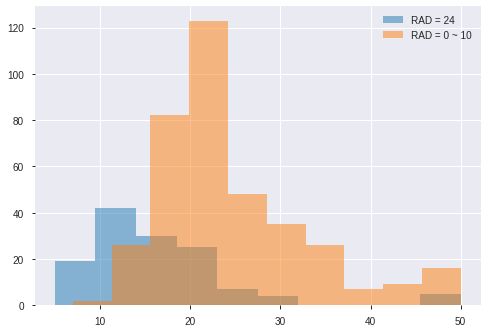

In [67]:
plt.hist(rad_24['MEDV'], label = "RAD = 24", alpha = 0.5)
plt.hist(rad_0_10['MEDV'], label = "RAD = 0 ~ 10", alpha = 0.5)
plt.legend()

(array([  2.,  26.,  82., 123.,  48.,  35.,  26.,   7.,   9.,  16.]),
 array([ 7. , 11.3, 15.6, 19.9, 24.2, 28.5, 32.8, 37.1, 41.4, 45.7, 50. ]),
 <a list of 10 Patch objects>)

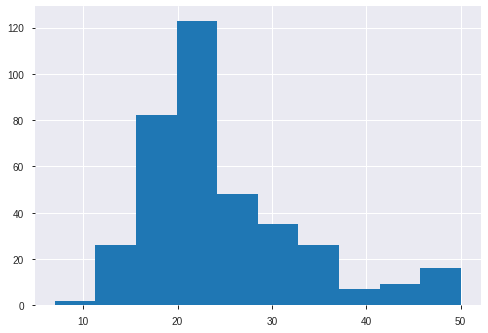

In [68]:
plt.hist(rad_0_10['MEDV'])

In [ ]:
# 야 8
# 너 1
# 알았어 4
# 오?! 4
# 너~느은~ 1

In [ ]:
보스턴 Features들은 

  * **CRIM**: 자치 시(town) 별 1인당 범죄율
  * **ZN**: 25,000 평방피트를 초과하는 거주지역의 비율

  * **INDUS**: 비소매상업지역이 점유하고 있는 토지의 비율

  * **CHAS**: 찰스강의 경계에 위치해 있으면 1, 그렇지 않으면 0

  * **NOX**: 10ppm당 농축 일산화질소
  * **RM**: 주택 1가구당 평균 방의 개수

  * **AGE**: 1940년 이전에 건축된 소유주택의 비율
  * **DIS**: 5개의 보스턴 직업센터까지의 접근성 지수
  * **RAD**: 방사형 도로까지의 접근성 지수

  * **TAX**: 10,000 달러 당 재산세율

  * **PTRATIO**: 자치 시(town)별 학생/교사 비율

  * **B**: 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.

  * **LSTAT**: 모집단의 하위계층 비율(%)

  * **MEDV**: 본인 소유의 주택가격(중앙값) (단위: $1,000)

  

In [78]:
# 2-sample-t test for CHAS discrete feature(0, 1) 
import scipy.stats as stats

t_result = stats.ttest_ind(df_raw[df_raw['CHAS'] == 0]['MEDV'],df_raw[df_raw['CHAS'] == 1]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature CHAS")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['CRIM'] > df_raw['CRIM'].median()]['MEDV'],
                           df_raw[df_raw['CRIM'] <= df_raw['CRIM'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature CRIM")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['ZN'] > df_raw['ZN'].median()]['MEDV'],
                           df_raw[df_raw['ZN'] <= df_raw['ZN'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature ZN")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['INDUS'] > df_raw['INDUS'].median()]['MEDV'],
                           df_raw[df_raw['INDUS'] <= df_raw['INDUS'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature INDUS")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['NOX'] > df_raw['NOX'].median()]['MEDV'],
                           df_raw[df_raw['NOX'] <= df_raw['NOX'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature NOX")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['RM'] > df_raw['RM'].median()]['MEDV'],
                           df_raw[df_raw['RM'] <= df_raw['RM'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature RM")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['AGE'] > df_raw['AGE'].median()]['MEDV'],
                           df_raw[df_raw['AGE'] <= df_raw['AGE'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature AGE")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['DIS'] > df_raw['DIS'].median()]['MEDV'],
                           df_raw[df_raw['DIS'] <= df_raw['DIS'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature DIS")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['RAD'] > df_raw['RAD'].median()]['MEDV'],
                           df_raw[df_raw['RAD'] <= df_raw['RAD'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature RAD")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['TAX'] > df_raw['TAX'].median()]['MEDV'],
                           df_raw[df_raw['TAX'] <= df_raw['TAX'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature TAX")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['PTRATIO'] > df_raw['PTRATIO'].median()]['MEDV'],
                           df_raw[df_raw['PTRATIO'] <= df_raw['PTRATIO'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature PTRATIO")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['B'] > df_raw['B'].median()]['MEDV'],
                           df_raw[df_raw['B'] <= df_raw['B'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature B")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['LSTAT'] > df_raw['LSTAT'].median()]['MEDV'],
                           df_raw[df_raw['LSTAT'] <= df_raw['LSTAT'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature LSTAT")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

2 sample t-test for Feature CHAS
t : -3.996
p-value : 0.000
2 sample t-test for Feature CRIM
t : -6.120
p-value : 0.000
2 sample t-test for Feature ZN
t : 9.038
p-value : 0.000
2 sample t-test for Feature INDUS
t : -10.367
p-value : 0.000
2 sample t-test for Feature NOX
t : -8.454
p-value : 0.000
2 sample t-test for Feature RM
t : 12.046
p-value : 0.000
2 sample t-test for Feature AGE
t : -8.561
p-value : 0.000
2 sample t-test for Feature DIS
t : 6.362
p-value : 0.000
2 sample t-test for Feature RAD
t : -5.973
p-value : 0.000
2 sample t-test for Feature TAX
t : -9.213
p-value : 0.000
2 sample t-test for Feature PTRATIO
t : -12.328
p-value : 0.000
2 sample t-test for Feature B
t : 0.679
p-value : 0.497
2 sample t-test for Feature LSTAT
t : -18.565
p-value : 0.000


(array([ 54., 100., 108.,  32.,  74.,   1.,   0.,   0.,   0., 137.]),
 array([187. , 239.4, 291.8, 344.2, 396.6, 449. , 501.4, 553.8, 606.2,
        658.6, 711. ]),
 <a list of 10 Patch objects>)

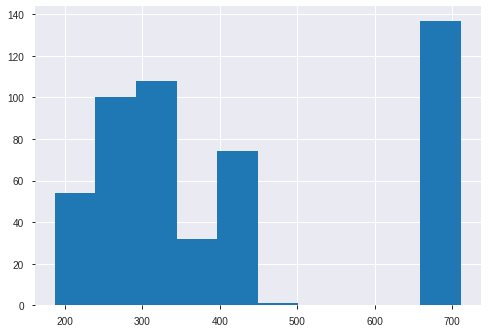

In [79]:
plt.hist(df_raw['TAX'])

In [155]:
df_tax_600 = df_raw[df_raw['TAX']>600]
df_tax_0 = df_raw[df_raw['TAX'] < 600]

In [158]:
t_result = stats.ttest_ind(df_tax_600['MEDV'], df_tax_0['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature tax")
print("t : %.3f" %t)
print("p-value : %.3f" %p)
print("medv mean for tax over 600 : {}".format(df_tax_600['MEDV'].mean()))
print("medv mean for tax under 600 : {}".format(df_tax_0['MEDV'].mean()))

df_raw['tax_600'] 

2 sample t-test for Feature tax
t : -10.246
p-value : 0.000
medv mean for tax over 600 : 16.272262795912408
medv mean for tax under 600 : 24.85718161623306


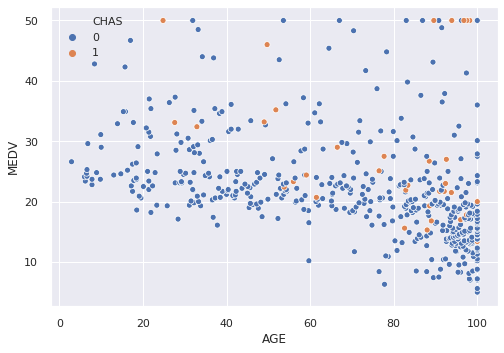

In [179]:
sns.scatterplot(df_raw['AGE'],df_raw['MEDV'], hue = 'CHAS', data= df_raw)

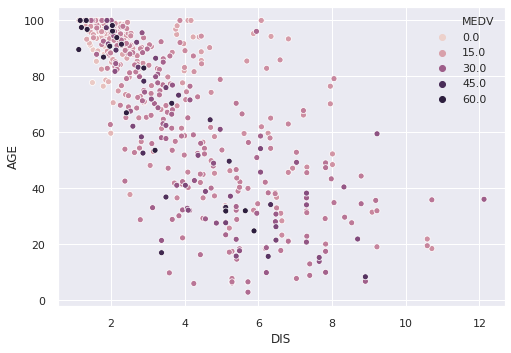

In [203]:
sns.scatterplot(df_raw['DIS'],df_raw['AGE'], hue = 'MEDV', data= df_raw)


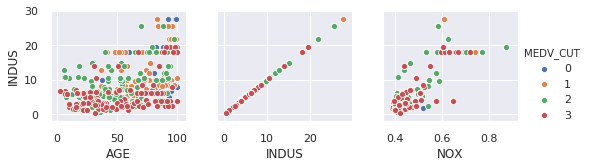

In [357]:
sns.set(font_scale = 1)
sns.pairplot(df_raw, y_vars = ['INDUS'], x_vars = ['AGE','INDUS','NOX'], hue = 'MEDV_CUT')

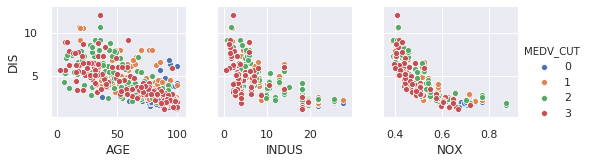

In [202]:
sns.set(font_scale = 1)
sns.pairplot(df_raw, y_vars = ['DIS'], x_vars = ['AGE','INDUS','NOX'], hue = 'MEDV_CUT')

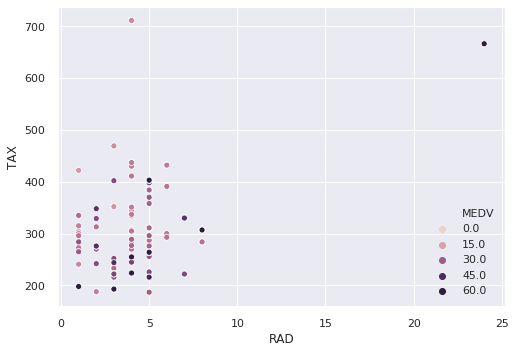

In [200]:
sns.scatterplot(df_raw['RAD'],df_raw['TAX'], hue = 'MEDV', data= df_raw)


In [176]:
df_raw['Bk'] = np.sqrt(df_raw['B']/1000) + 0.63
df_raw['Bk']

0      1.260000
1      1.250460
2      1.260000
3      1.211515
4      0.927103
         ...   
501    1.242642
502    1.254260
503    1.250113
504    1.219814
505    1.256602
Name: Bk, Length: 506, dtype: float64

In [194]:
# 주택가격 MEDV 등급화
df_raw['MEDV_CUT'] = df_raw['MEDV']

bins = [0,17.025,21.200001,25,51]
labels = [0,1,2,3]

df_raw['MEDV_CUT'] = pd.cut(df_raw['MEDV'], bins, labels = labels)

8

# 변수 전부 써서 만든 선형회귀

In [149]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

In [150]:
reg_model = smf.ols(formula = "MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 08 Feb 2020   Prob (F-statistic):          6.72e-135
Time:                        13:11:22   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

In [151]:
df_raw_x = df_raw.drop(["MEDV",'AGE_CUT','DIS_CUT'], axis = 1)
df_raw_x_const = add_constant(df_raw_x)
df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]

df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

,variable,VIF
5,CHAS,1.074
13,B,1.349
2,CRIM,1.793
12,PTRATIO,1.801
7,RM,1.940
1,index,2.076
3,ZN,2.320
14,LSTAT,2.943
8,AGE,3.184
9,DIS,3.977


In [473]:
reg_model = smf.ols(formula = "MEDV ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sat, 08 Feb 2020   Prob (F-statistic):          5.54e-137
Time:                        23:56:06   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.0

In [474]:
from statsmodels.stats.stattools import omni_normtest
omni_normtest(reg_result.resid, axis = 0)

NormaltestResult(statistic=178.43044475317788, pvalue=1.7960615684719786e-39)

(0.901307225227356, 1.457659164366048e-17)


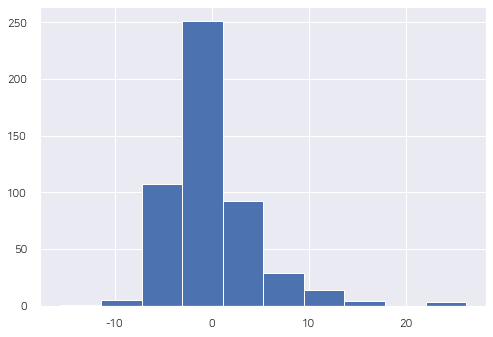

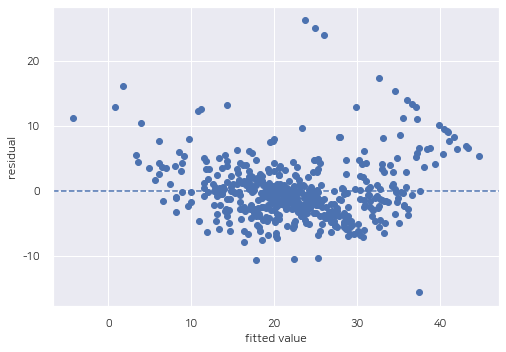

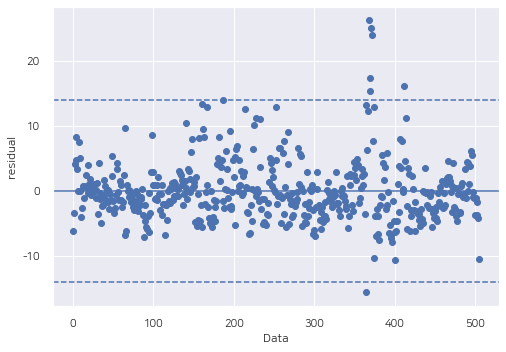

1.077875028881115


In [475]:
result = reg_result
from scipy.stats import shapiro

# 정규성검정
plt.hist(result.resid)
print(shapiro(result.resid))
plt.show()

# 등분산성 검정
plt.scatter(result.fittedvalues, result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")
plt.show()

# 독립성 검정
plt.scatter(range(0,506), result.resid, marker = "o")
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "-")
plt.axhline(y = 3 * np.std(result.resid), linestyle = "--")
plt.axhline(y = - 3 * np.std(result.resid), linestyle = "--")
plt.show()
# 더빈왓슨 통계량
from statsmodels.stats.stattools import durbin_watson
print(durbin_watson(result.resid))

# 그냥 변수 전부 써서 만든 의사결정나무

In [466]:
dt_model = DecisionTreeRegressor(random_state = 1234,
                                min_samples_leaf = 6,
                                min_samples_split = 14,
                                max_depth = 4)
dt_model.fit(df_train_x, df_train_y)
print("score on training set : {}".format(dt_model.score(df_train_x, df_train_y)))
print("score on test set : {}".format(dt_model.score(df_test_x, df_test_y)))

score on training set : 0.8683949155556454
score on test set : 0.8238860839809209


# 그냥 변수 전부 써서 해본 랜덤포레스트 모델

In [121]:
df_raw_y = df_raw['MEDV']
df_raw_x = df_raw.drop(['MEDV','AGE_CUT','DIS_CUT','index'], axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_x.shape))

train data X size : (354, 13)
train data Y size : (354,)
test data X size : (152, 13)
test data Y size : (152, 13)


In [122]:
rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))


Score on training set : 0.973
Score on test set : 0.900


In [123]:
train_score = []; test_score = []

para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n['n_estimator'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score
df_score_n.round(3)

,n_estimator,TrainScore,TestScore
0,10,0.973,0.900
1,20,0.978,0.902
2,30,0.978,0.901
3,40,0.979,0.902
4,50,0.980,0.902
5,60,0.981,0.900
6,70,0.981,0.902
7,80,0.982,0.904
8,90,0.981,0.906
9,100,0.981,0.906


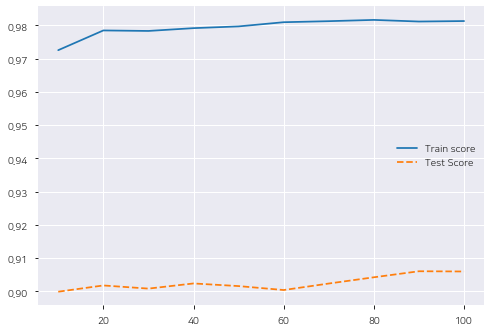

In [124]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.legend()


In [125]:
train_score = []; test_score = [];

para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state = 1234,
                              n_estimators = 20,
                              min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.978,0.902
1,2,0.959,0.894
2,3,0.942,0.891
3,4,0.921,0.883
4,5,0.908,0.876
5,6,0.896,0.874
6,7,0.885,0.870
7,8,0.875,0.868
8,9,0.866,0.862
9,10,0.860,0.856


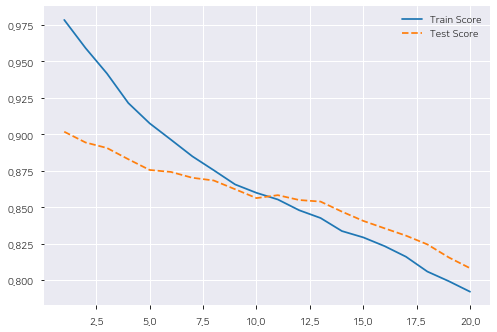

In [126]:
plt.plot(para_leaf, train_score, linestyle = "-", label  = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label  = "Test Score")
plt.legend()

In [127]:
train_score = []; test_score = [];

para_split = [n_split * 2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state = 1234,
                              n_estimators = 20,
                              min_samples_leaf = 6,
                              min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.896,0.874
1,6,0.896,0.874
2,8,0.896,0.874
3,10,0.896,0.874
4,12,0.896,0.874
5,14,0.891,0.874
6,16,0.888,0.873
7,18,0.883,0.869
8,20,0.880,0.868
9,22,0.877,0.865


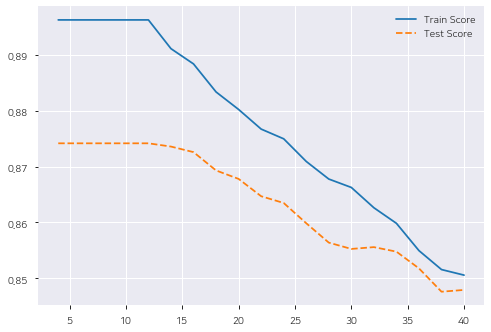

In [128]:
plt.plot(para_split, train_score, linestyle = "-", label  = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label  = "Test Score")
plt.legend()

In [129]:
train_score = []; test_score = [];

para_depth = [n_depth for n_depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state = 1234,
                              n_estimators = 20,
                              min_samples_leaf = 6,
                              min_samples_split = 12,
                              max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['MinSamplesSplit'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

df_score_depth.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,1,0.591,0.581
1,2,0.768,0.821
2,3,0.844,0.859
3,4,0.873,0.865
4,5,0.888,0.870
5,6,0.893,0.871
6,7,0.895,0.873
7,8,0.896,0.874
8,9,0.896,0.874
9,10,0.896,0.874


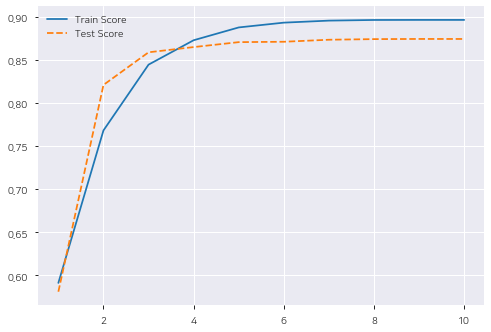

In [130]:
plt.plot(para_depth, train_score, linestyle = "-", label  = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label  = "Test Score")
plt.legend()

In [131]:
rf_final = RandomForestRegressor(random_state = 1234,
                                n_estimators = 20,
                                min_samples_leaf = 6,
                                min_samples_split = 14,
                                max_depth = 4)
rf_final.fit(df_train_x, df_train_y)
print("score on training set : {}".format(rf_final.score(df_train_x, df_train_y)))
print("score on test set : {}".format(rf_final.score(df_test_x, df_test_y)))

score on training set : 0.8695648552379851
score on test set : 0.8650093927633944


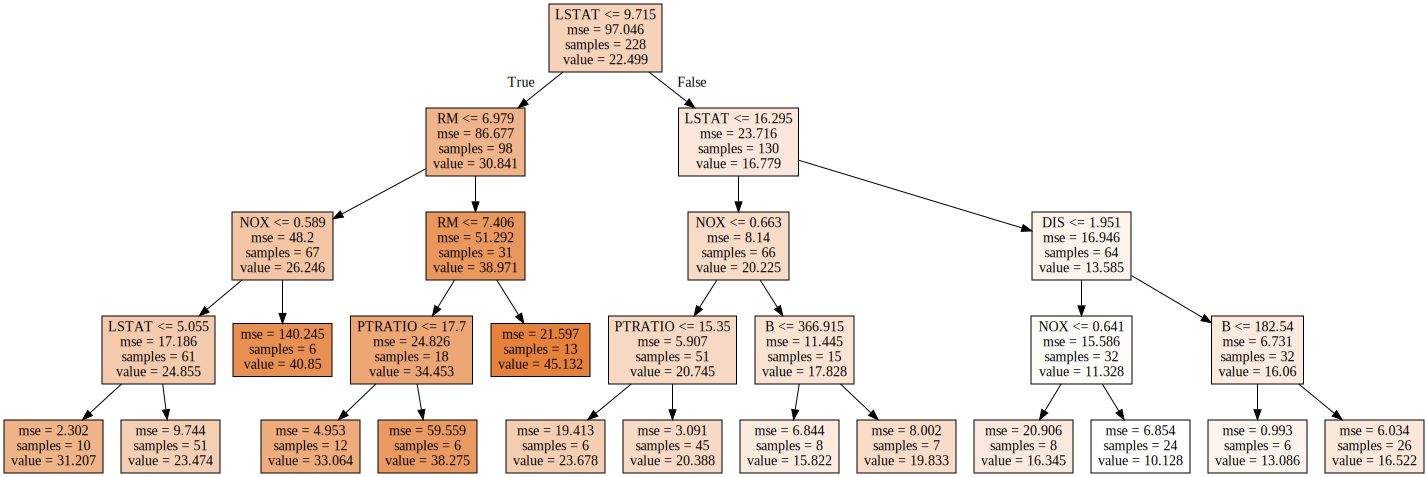

In [132]:
# 다수의 의사결정나무 중 첫번째(0번째)를 출력
v_feature_name = df_train_x.columns
export_graphviz(rf_final.estimators_[0], out_file = "rfr_final_0.dot",
               feature_names = v_feature_name, impurity = True, filled = True)
with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [133]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
12,LSTAT,0.556
5,RM,0.329
0,CRIM,0.029
7,DIS,0.027
4,NOX,0.027
10,PTRATIO,0.011
9,TAX,0.006
6,AGE,0.006
8,RAD,0.005
11,B,0.004


Text(0, 0.5, '변수')

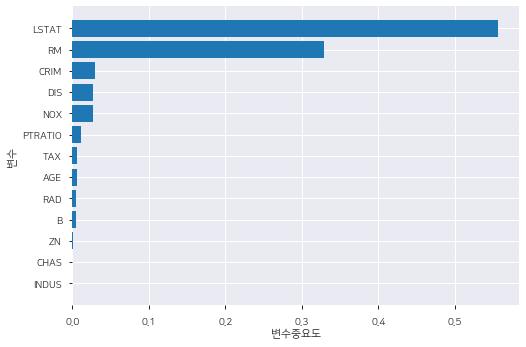

In [134]:
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수중요도")
plt.ylabel("변수")

# 그냥 전부써서 돌려본 그레디어트 부스팅

In [204]:
rf_uncustomized = GradientBoostingRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))


Score on training set : 0.983
Score on test set : 0.922


In [205]:
train_score = []; test_score = []

para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = GradientBoostingRegressor(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n['n_estimator'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

df_score_n.round(3)

,n_estimator,TrainScore,TestScore
0,10,0.773,0.748
1,20,0.910,0.862
2,30,0.943,0.900
3,40,0.958,0.911
4,50,0.967,0.915
5,60,0.973,0.917
6,70,0.976,0.919
7,80,0.979,0.921
8,90,0.981,0.921
9,100,0.983,0.922


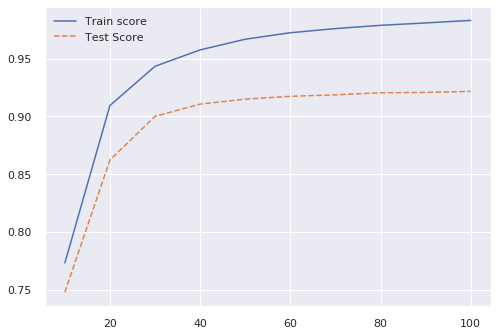

In [206]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.legend()


In [207]:
train_score = []; test_score = [];

para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = GradientBoostingRegressor(random_state = 1234,
                              n_estimators = 40,
                              min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.958,0.911
1,2,0.957,0.910
2,3,0.951,0.905
3,4,0.951,0.901
4,5,0.944,0.898
5,6,0.943,0.902
6,7,0.940,0.896
7,8,0.937,0.895
8,9,0.932,0.888
9,10,0.930,0.890


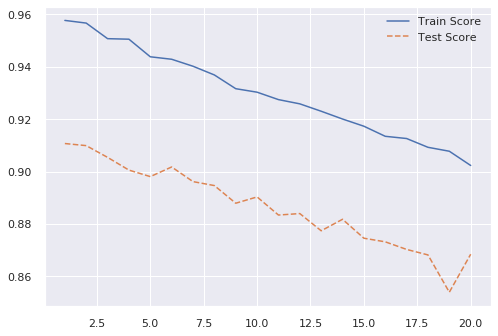

In [208]:
plt.plot(para_leaf, train_score, linestyle = "-", label  = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label  = "Test Score")
plt.legend()

In [209]:
train_score = []; test_score = [];

para_split = [n_split * 2 for n_split in range(1,21)]

for v_min_samples_split in para_split:
    rf = GradientBoostingRegressor(random_state = 1234,
                              n_estimators = 40,
                              min_samples_leaf = 6,
                              min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.943,0.902
1,4,0.943,0.902
2,6,0.943,0.902
3,8,0.943,0.902
4,10,0.943,0.902
5,12,0.943,0.902
6,14,0.942,0.899
7,16,0.942,0.900
8,18,0.940,0.894
9,20,0.940,0.895


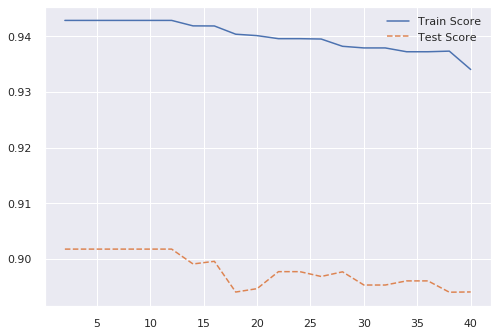

In [210]:
plt.plot(para_split, train_score, linestyle = "-", label  = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label  = "Test Score")
plt.legend()

In [211]:
train_score = []; test_score = [];

para_depth = [n_depth for n_depth in range(1,11)]

for v_max_depth in para_depth:
    rf = GradientBoostingRegressor(random_state = 1234,
                              n_estimators = 40,
                              min_samples_leaf = 6,
                              min_samples_split = 12,
                              max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['MinSamplesSplit'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

df_score_depth.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,1,0.798,0.816
1,2,0.903,0.869
2,3,0.943,0.902
3,4,0.963,0.901
4,5,0.978,0.894
5,6,0.983,0.902
6,7,0.987,0.894
7,8,0.990,0.893
8,9,0.990,0.895
9,10,0.991,0.898


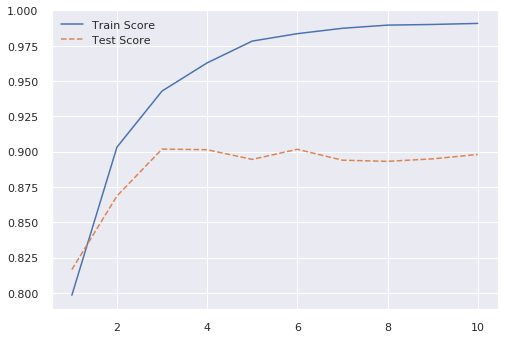

In [212]:
plt.plot(para_depth, train_score, linestyle = "-", label  = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label  = "Test Score")
plt.legend()

In [215]:
train_score = []; test_score = [];

para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    rf = GradientBoostingRegressor(random_state = 1234,
                              n_estimators = 40,
                              min_samples_leaf = 6,
                              min_samples_split = 12,
                              max_depth = 6,
                              learning_rate = v_learning_rate)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_lr = pd.DataFrame()
df_score_lr['Learningrare'] = para_lr
df_score_lr['TrainScore'] = train_score
df_score_lr['TestScore'] = test_score

df_score_lr.round(3)

,Learningrare,TrainScore,TestScore
0,0.1,0.983,0.902
1,0.2,0.995,0.906
2,0.3,0.998,0.907
3,0.4,0.999,0.891
4,0.5,1.000,0.884
5,0.6,1.000,0.872
6,0.7,1.000,0.875
7,0.8,1.000,0.856
8,0.9,1.000,0.847


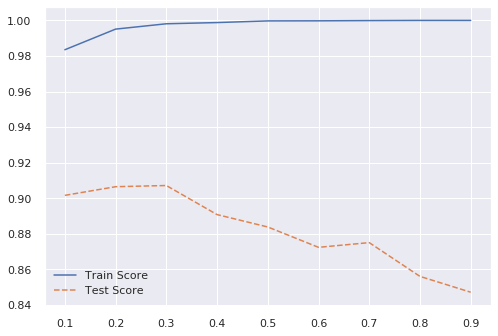

In [216]:
plt.plot(para_lr, train_score, linestyle = "-", label  = "Train Score")
plt.plot(para_lr, test_score, linestyle = "--", label  = "Test Score")
plt.legend()

In [240]:
gb_final = GradientBoostingRegressor(random_state = 1234,
                                n_estimators = 40,
                                min_samples_leaf = 6,
                                min_samples_split = 12,
                                max_depth = 6,
                                learning_rate = 0.2)
gb_final.fit(df_train_x, df_train_y)
print("score on training set : {}".format(gb_final.score(df_train_x, df_train_y)))
print("score on test set : {}".format(gb_final.score(df_test_x, df_test_y)))

score on training set : 0.9950789409294934
score on test set : 0.9064959563888323


Text(0, 0.5, '변수')

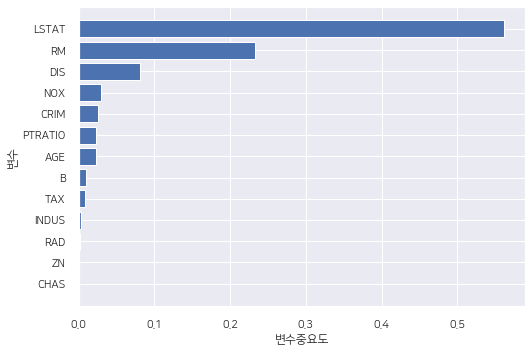

In [223]:
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수중요도")
plt.ylabel("변수")

# 이상치 정제좀 해봅시다.

In [246]:
df_raw['RAD_CUT'] = df_raw['RAD']
df_raw.loc[df_raw['RAD'] > 20,'RAD_CUT'] = 1
df_raw.loc[df_raw['RAD'] < 20,'RAD_CUT'] = 0
df_raw

,index,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,AGE_CUT,DIS_CUT,Bk,MEDV_CUT,RAD_CUT
0,398,5.0,38.351799,0.0,18.10,0,0.693,5.453,100.000000,1.4896,24,666,20.200001,396.899994,30.590000,매우많음,최하,1.260000,0,1
1,405,5.0,67.920799,0.0,18.10,0,0.693,5.683,100.000000,1.4254,24,666,20.200001,384.970001,22.980000,매우많음,최하,1.250460,0,1
2,400,5.6,25.046101,0.0,18.10,0,0.693,5.987,100.000000,1.5888,24,666,20.200001,396.899994,26.770000,매우많음,최하,1.260000,0,1
3,399,6.3,9.916550,0.0,18.10,0,0.693,5.852,77.800003,1.5004,24,666,20.200001,338.160004,29.969999,많음,최하,1.211515,0,1
4,414,7.0,45.746101,0.0,18.10,0,0.693,4.519,100.000000,1.6582,24,666,20.200001,88.269997,36.980000,매우많음,최하,0.927103,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,369,50.0,5.669980,0.0,18.10,1,0.631,6.683,96.800003,1.3567,24,666,20.200001,375.329987,3.730000,매우많음,최하,1.242642,3,1
502,257,50.0,0.611540,20.0,3.97,0,0.647,8.704,86.900002,1.8010,5,264,13.000000,389.700012,5.120000,많음,최하,1.254260,3,0
503,267,50.0,0.578340,20.0,3.97,0,0.575,8.297,67.000000,2.4216,5,264,13.000000,384.540008,7.440000,적음,하,1.250113,3,0
504,372,50.0,8.267250,0.0,18.10,1,0.668,5.875,89.599998,1.1296,24,666,20.200001,347.880005,8.880000,많음,최하,1.219814,3,1


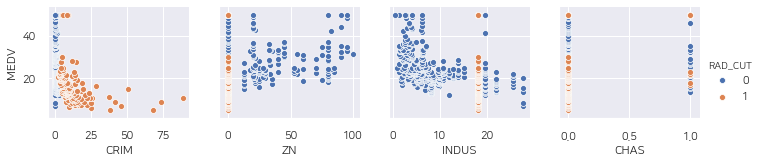

In [253]:
sns.pairplot(df_raw, y_vars = ['MEDV'], x_vars = ['CRIM','ZN','INDUS','CHAS'], hue = 'RAD_CUT')

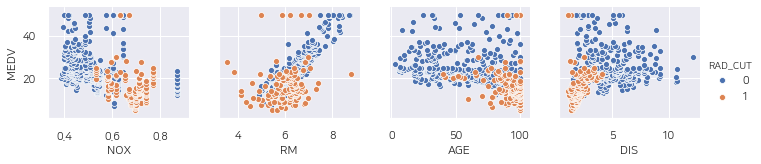

In [254]:
sns.pairplot(df_raw, y_vars = ['MEDV'], x_vars = ['NOX','RM','AGE','DIS'], hue = 'RAD_CUT')

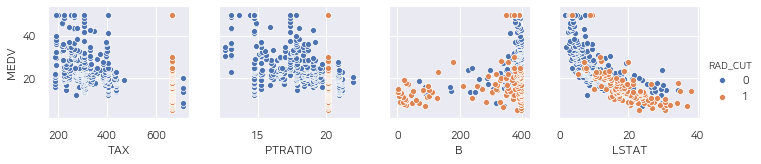

In [260]:
sns.pairplot(df_raw, y_vars = ['MEDV'], x_vars = ['TAX','PTRATIO','B','LSTAT'], hue = 'RAD_CUT')

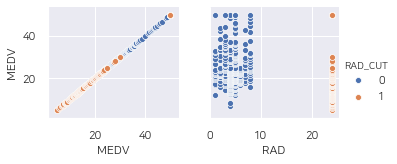

In [261]:
sns.pairplot(df_raw, y_vars = ['MEDV'], x_vars = ['MEDV','RAD'], hue = 'RAD_CUT')

# RAD가 이상함

In [257]:
df_rad_24 = df_raw[df_raw['RAD'] > 20]
df_rad_0 = df_raw[df_raw['RAD'] < 20]

t_result = stats.ttest_ind(df_rad_24['MEDV'],df_rad_0['MEDV'])

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature CHAS")
print("t : %.3f" %t)
print("p-value : %.3f" %p)
print("MEDV mean for RAD is 24 : {}".format(df_rad_24['MEDV'].mean()))
print("MEDV mean for RAD under 24 : {}".format(df_rad_0['MEDV'].mean()))


2 sample t-test for Feature CHAS
t : -9.690
p-value : 0.000
MEDV mean for RAD is 24 : 16.403787894613636
MEDV mean for RAD under 24 : 24.69598935117914


(array([ 54., 100., 108.,  32.,  74.,   1.,   0.,   0.,   0.,   5.]),
 array([187. , 239.4, 291.8, 344.2, 396.6, 449. , 501.4, 553.8, 606.2,
        658.6, 711. ]),
 <a list of 10 Patch objects>)

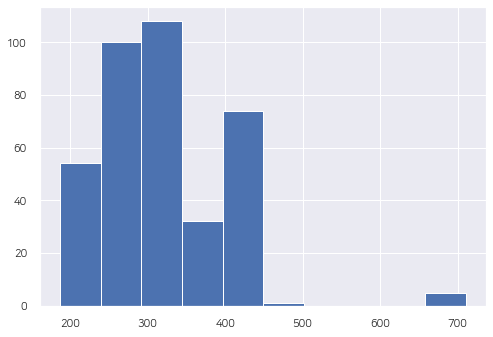

In [258]:
plt.hist(df_rad_0['TAX'])

In [259]:
df_rad_0[df_rad_0['TAX']>600]

,index,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,AGE_CUT,DIS_CUT,Bk,MEDV_CUT,RAD_CUT
5,489,7.0,0.18337,0.0,27.74,0,0.609,5.414,98.300003,1.7554,4,711,20.1,344.049988,23.969999,매우많음,최하,1.216558,0,0
11,490,8.1,0.20746,0.0,27.74,0,0.609,5.093,98.000000,1.8226,4,711,20.1,318.429993,29.680000,매우많음,최하,1.194296,0,0
68,491,13.6,0.10574,0.0,27.74,0,0.609,5.983,98.800003,1.8681,4,711,20.1,390.109985,18.070000,매우많음,최하,1.254588,0,0
99,488,15.2,0.15086,0.0,27.74,0,0.609,5.454,92.699997,1.8209,4,711,20.1,395.089996,18.059999,많음,최하,1.258562,0,0
216,492,20.1,0.11132,0.0,27.74,0,0.609,5.983,83.500000,2.1099,4,711,20.1,396.899994,13.350000,많음,하,1.260000,1,0


# TAX도 이상함

In [264]:
df_raw['TAX_CUT'] = df_raw['TAX']
df_raw.loc[df_raw['TAX']>600, 'TAX_CUT'] = 1
df_raw.loc[df_raw['TAX']>700, 'TAX_CUT'] = 2
df_raw.loc[df_raw['TAX']<600, 'TAX_CUT'] = 0

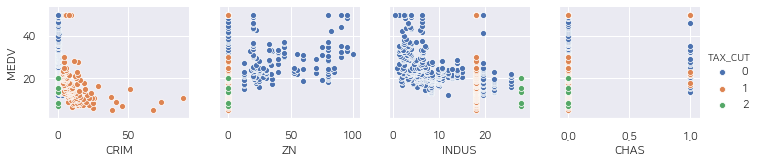

In [265]:
sns.pairplot(df_raw, y_vars = ['MEDV'], x_vars = ['CRIM','ZN','INDUS','CHAS'], hue = 'TAX_CUT')


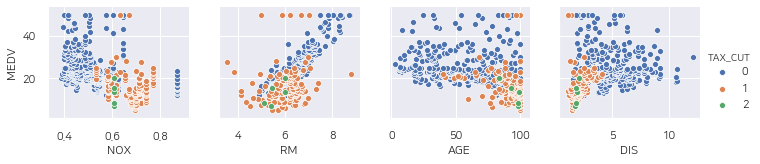

In [266]:
sns.pairplot(df_raw, y_vars = ['MEDV'], x_vars = ['NOX','RM','AGE','DIS'], hue = 'TAX_CUT')


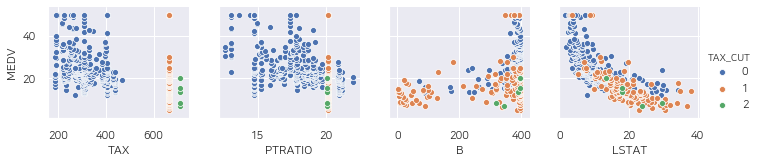

In [267]:
sns.pairplot(df_raw, y_vars = ['MEDV'], x_vars = ['TAX','PTRATIO','B','LSTAT'], hue = 'TAX_CUT')


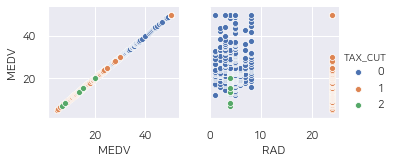

In [268]:
sns.pairplot(df_raw, y_vars = ['MEDV'], x_vars = ['MEDV','RAD'], hue = 'TAX_CUT')

In [273]:
df_rad_0

,index,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,AGE_CUT,DIS_CUT,Bk,MEDV_CUT,RAD_CUT
5,489,7.0,0.18337,0.0,27.74,0,0.6090,5.414,98.300003,1.7554,4,711,20.100000,344.049988,23.969999,매우많음,최하,1.216558,0,0
11,490,8.1,0.20746,0.0,27.74,0,0.6090,5.093,98.000000,1.8226,4,711,20.100000,318.429993,29.680000,매우많음,최하,1.194296,0,0
40,144,11.8,2.77974,0.0,19.58,0,0.8710,4.903,97.800003,1.3459,5,403,14.700000,396.899994,29.290001,매우많음,최하,1.260000,0,0
42,505,11.9,0.04741,0.0,11.93,0,0.5730,6.030,80.800003,2.5050,1,273,21.000000,396.899994,7.880000,많음,하,1.260000,0,0
48,30,12.7,1.13081,0.0,8.14,0,0.5380,5.713,94.099998,4.2330,4,307,21.000000,360.170013,22.600000,매우많음,상,1.230142,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,204,50.0,0.02009,95.0,2.68,0,0.4161,8.034,31.900000,5.1180,4,224,14.700000,390.549988,2.880000,매우적음,최상,1.254940,3,0
497,225,50.0,0.52693,0.0,6.20,0,0.5040,8.725,83.000000,2.8944,8,307,17.400000,382.000000,4.630000,많음,하,1.248061,3,0
502,257,50.0,0.61154,20.0,3.97,0,0.6470,8.704,86.900002,1.8010,5,264,13.000000,389.700012,5.120000,많음,최하,1.254260,3,0
503,267,50.0,0.57834,20.0,3.97,0,0.5750,8.297,67.000000,2.4216,5,264,13.000000,384.540008,7.440000,적음,하,1.250113,3,0


# 선형회귀예측으로 RAD를 예측해 RAD=24인 데이터에 예측값을 넣어서 이상치를 해결한다

In [274]:
df_rad_24

,index,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,AGE_CUT,DIS_CUT,Bk,MEDV_CUT,RAD_CUT
0,398,5.0,38.351799,0.0,18.1,0,0.693,5.453,100.000000,1.4896,24,666,20.200001,396.899994,30.590000,매우많음,최하,1.260000,0,1
1,405,5.0,67.920799,0.0,18.1,0,0.693,5.683,100.000000,1.4254,24,666,20.200001,384.970001,22.980000,매우많음,최하,1.250460,0,1
2,400,5.6,25.046101,0.0,18.1,0,0.693,5.987,100.000000,1.5888,24,666,20.200001,396.899994,26.770000,매우많음,최하,1.260000,0,1
3,399,6.3,9.916550,0.0,18.1,0,0.693,5.852,77.800003,1.5004,24,666,20.200001,338.160004,29.969999,많음,최하,1.211515,0,1
4,414,7.0,45.746101,0.0,18.1,0,0.693,4.519,100.000000,1.6582,24,666,20.200001,88.269997,36.980000,매우많음,최하,0.927103,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,371,50.0,9.232300,0.0,18.1,0,0.631,6.216,100.000000,1.1691,24,666,20.200001,366.149994,9.530000,매우많음,최하,1.235103,3,1
499,370,50.0,6.538760,0.0,18.1,1,0.631,7.016,97.500000,1.2024,24,666,20.200001,392.049988,2.960000,매우많음,최하,1.256139,3,1
500,368,50.0,4.898220,0.0,18.1,0,0.631,4.970,100.000000,1.3325,24,666,20.200001,375.519989,3.260000,매우많음,최하,1.242797,3,1
501,369,50.0,5.669980,0.0,18.1,1,0.631,6.683,96.800003,1.3567,24,666,20.200001,375.329987,3.730000,매우많음,최하,1.242642,3,1


In [297]:
df_train_y = df_rad_0['RAD']
df_train_x = df_rad_0.drop(['RAD','AGE_CUT','DIS_CUT','index','Bk','MEDV_CUT','RAD_CUT','TAX'], axis = 1, inplace = False)

df_test_y = df_rad_24['RAD']
df_test_x = df_rad_24.drop(['RAD','AGE_CUT','DIS_CUT','index','Bk','MEDV_CUT','RAD_CUT','TAX'], axis = 1, inplace = False)

In [298]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(df_train_x, df_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [299]:
rad_predicted = mlr.predict(df_test_x)

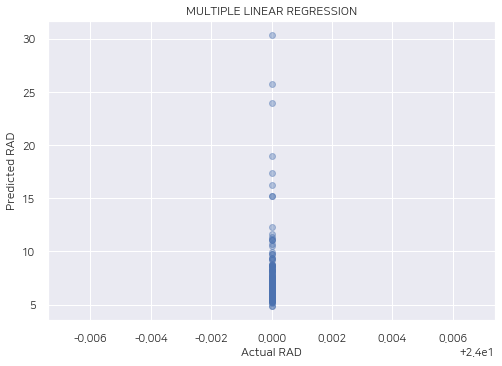

In [300]:
plt.scatter(df_test_y, rad_predicted, alpha=0.4)
plt.xlabel("Actual RAD")
plt.ylabel("Predicted RAD")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [301]:
np.median(rad_predicted)

6.932548924578805

In [302]:
rad_predicted.mean()

7.946772712258454

(array([81., 35.,  8.,  0.,  4.,  1.,  0.,  1.,  1.,  1.]),
 array([ 4.85679719,  7.41397911,  9.97116102, 12.52834294, 15.08552485,
        17.64270677, 20.19988868, 22.7570706 , 25.31425251, 27.87143443,
        30.42861634]),
 <a list of 10 Patch objects>)

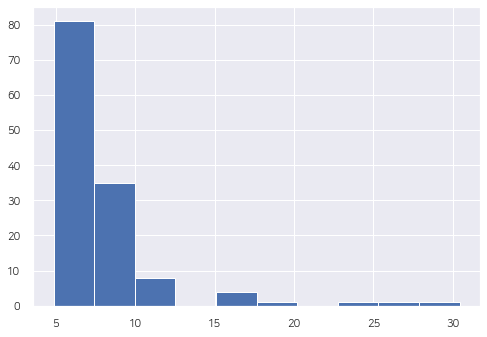

In [304]:
plt.hist(rad_predicted)

In [311]:
# 예측값에서 중앙값을 넘어가는 값들은
# 평균 = 중앙값, 표준편차 1의 정규분포에서 생성된 랜덤난수를 부여했다.
for i in range(len(rad_predicted)):
    if rad_predicted[i] > np.median(rad_predicted):
        rad_predicted[i] = np.random.normal(np.median(rad_predicted), 1)

(array([ 4., 17., 21., 30., 26.,  9., 16.,  5.,  2.,  2.]),
 array([4.51691104, 4.92359121, 5.33027137, 5.73695153, 6.1436317 ,
        6.55031186, 6.95699203, 7.36367219, 7.77035236, 8.17703252,
        8.58371269]),
 <a list of 10 Patch objects>)

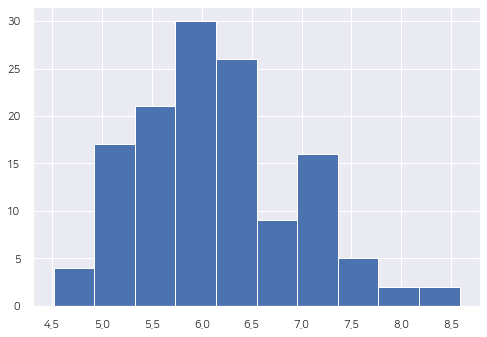

In [312]:
plt.hist(rad_predicted)

In [284]:
df_test_x

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,5.0,38.351799,0.0,18.1,0,0.693,5.453,100.000000,1.4896,666,20.200001,396.899994,30.590000
1,5.0,67.920799,0.0,18.1,0,0.693,5.683,100.000000,1.4254,666,20.200001,384.970001,22.980000
2,5.6,25.046101,0.0,18.1,0,0.693,5.987,100.000000,1.5888,666,20.200001,396.899994,26.770000
3,6.3,9.916550,0.0,18.1,0,0.693,5.852,77.800003,1.5004,666,20.200001,338.160004,29.969999
4,7.0,45.746101,0.0,18.1,0,0.693,4.519,100.000000,1.6582,666,20.200001,88.269997,36.980000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,50.0,9.232300,0.0,18.1,0,0.631,6.216,100.000000,1.1691,666,20.200001,366.149994,9.530000
499,50.0,6.538760,0.0,18.1,1,0.631,7.016,97.500000,1.2024,666,20.200001,392.049988,2.960000
500,50.0,4.898220,0.0,18.1,0,0.631,4.970,100.000000,1.3325,666,20.200001,375.519989,3.260000
501,50.0,5.669980,0.0,18.1,1,0.631,6.683,96.800003,1.3567,666,20.200001,375.329987,3.730000


In [318]:
df_test_x['RAD_edited'] = rad_predicted

In [319]:
df_test_x

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,RAD_edited
0,5.0,38.351799,0.0,18.1,0,0.693,5.453,100.000000,1.4896,20.200001,396.899994,30.590000,6.601472
1,5.0,67.920799,0.0,18.1,0,0.693,5.683,100.000000,1.4254,20.200001,384.970001,22.980000,6.052275
2,5.6,25.046101,0.0,18.1,0,0.693,5.987,100.000000,1.5888,20.200001,396.899994,26.770000,6.572277
3,6.3,9.916550,0.0,18.1,0,0.693,5.852,77.800003,1.5004,20.200001,338.160004,29.969999,7.002209
4,7.0,45.746101,0.0,18.1,0,0.693,4.519,100.000000,1.6582,20.200001,88.269997,36.980000,5.803333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,50.0,9.232300,0.0,18.1,0,0.631,6.216,100.000000,1.1691,20.200001,366.149994,9.530000,6.128829
499,50.0,6.538760,0.0,18.1,1,0.631,7.016,97.500000,1.2024,20.200001,392.049988,2.960000,5.592057
500,50.0,4.898220,0.0,18.1,0,0.631,4.970,100.000000,1.3325,20.200001,375.519989,3.260000,5.955154
501,50.0,5.669980,0.0,18.1,1,0.631,6.683,96.800003,1.3567,20.200001,375.329987,3.730000,6.536035


In [347]:
df_raw['RAD_edited'] = df_raw['RAD']

In [348]:
df_raw['RAD']

0      24
1      24
2      24
3      24
4      24
       ..
501    24
502     5
503     5
504    24
505     3
Name: RAD, Length: 506, dtype: int64

(array([ 82., 225.,  43.,  24.,   0.,   0.,   0.,   0.,   0., 132.]),
 array([ 1. ,  3.3,  5.6,  7.9, 10.2, 12.5, 14.8, 17.1, 19.4, 21.7, 24. ]),
 <a list of 10 Patch objects>)

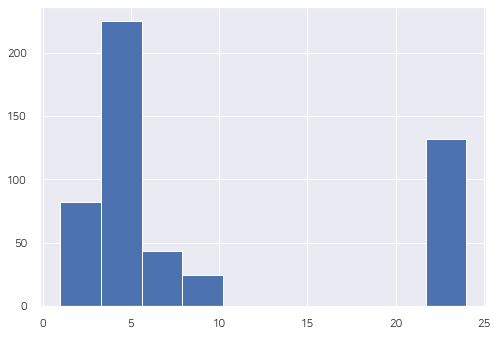

In [349]:
plt.hist(df_raw['RAD'])

In [350]:
# loc써서 특정조건의 행에 값 넣기
# RAD_edited에 넣기

df_raw.loc[df_raw['RAD']>20, 'RAD_edited'] = df_test_x['RAD_edited']

(array([ 20.,  24.,  38., 110.,   2., 146.,  74.,  49.,  15.,  28.]),
 array([1.        , 1.75837127, 2.51674254, 3.27511381, 4.03348507,
        4.79185634, 5.55022761, 6.30859888, 7.06697015, 7.82534142,
        8.58371269]),
 <a list of 10 Patch objects>)

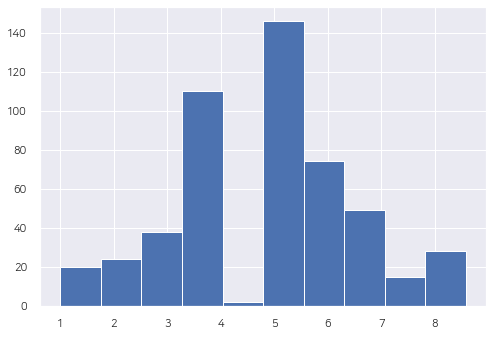

In [351]:
plt.hist(df_raw['RAD_edited'])

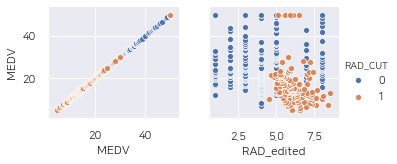

In [352]:
sns.pairplot(df_raw, y_vars = ['MEDV'], x_vars = ['MEDV','RAD_edited'], hue = 'RAD_CUT')

In [358]:
# 2-sample-t test for CHAS discrete feature(0, 1) 
import scipy.stats as stats

t_result = stats.ttest_ind(df_raw[df_raw['CHAS'] == 0]['MEDV'],df_raw[df_raw['CHAS'] == 1]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature CHAS")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['CRIM'] > df_raw['CRIM'].median()]['MEDV'],
                           df_raw[df_raw['CRIM'] <= df_raw['CRIM'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature CRIM")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['ZN'] > df_raw['ZN'].median()]['MEDV'],
                           df_raw[df_raw['ZN'] <= df_raw['ZN'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature ZN")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['INDUS'] > df_raw['INDUS'].median()]['MEDV'],
                           df_raw[df_raw['INDUS'] <= df_raw['INDUS'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature INDUS")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['NOX'] > df_raw['NOX'].median()]['MEDV'],
                           df_raw[df_raw['NOX'] <= df_raw['NOX'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature NOX")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['RM'] > df_raw['RM'].median()]['MEDV'],
                           df_raw[df_raw['RM'] <= df_raw['RM'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature RM")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['AGE'] > df_raw['AGE'].median()]['MEDV'],
                           df_raw[df_raw['AGE'] <= df_raw['AGE'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature AGE")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['DIS'] > df_raw['DIS'].median()]['MEDV'],
                           df_raw[df_raw['DIS'] <= df_raw['DIS'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature DIS")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['RAD_edited'] > df_raw['RAD_edited'].median()]['MEDV'],
                           df_raw[df_raw['RAD_edited'] <= df_raw['RAD_edited'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature RAD_edited")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['RAD'] > df_raw['RAD'].median()]['MEDV'],
                           df_raw[df_raw['RAD'] <= df_raw['RAD'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature RAD")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['TAX'] > df_raw['TAX'].median()]['MEDV'],
                           df_raw[df_raw['TAX'] <= df_raw['TAX'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature TAX")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['PTRATIO'] > df_raw['PTRATIO'].median()]['MEDV'],
                           df_raw[df_raw['PTRATIO'] <= df_raw['PTRATIO'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature PTRATIO")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['B'] > df_raw['B'].median()]['MEDV'],
                           df_raw[df_raw['B'] <= df_raw['B'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature B")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['LSTAT'] > df_raw['LSTAT'].median()]['MEDV'],
                           df_raw[df_raw['LSTAT'] <= df_raw['LSTAT'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature LSTAT")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

2 sample t-test for Feature CHAS
t : -3.996
p-value : 0.000
2 sample t-test for Feature CRIM
t : -6.120
p-value : 0.000
2 sample t-test for Feature ZN
t : 9.038
p-value : 0.000
2 sample t-test for Feature INDUS
t : -10.367
p-value : 0.000
2 sample t-test for Feature NOX
t : -8.454
p-value : 0.000
2 sample t-test for Feature RM
t : 12.046
p-value : 0.000
2 sample t-test for Feature AGE
t : -8.561
p-value : 0.000
2 sample t-test for Feature DIS
t : 6.362
p-value : 0.000
2 sample t-test for Feature RAD_edited
t : -5.820
p-value : 0.000
2 sample t-test for Feature RAD
t : -5.973
p-value : 0.000
2 sample t-test for Feature TAX
t : -9.213
p-value : 0.000
2 sample t-test for Feature PTRATIO
t : -12.328
p-value : 0.000
2 sample t-test for Feature B
t : 0.679
p-value : 0.497
2 sample t-test for Feature LSTAT
t : -18.565
p-value : 0.000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f2eb23b1750>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2eb2398d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2eb23b1710>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2eb2399810>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2ead186110>],
 'means': []}

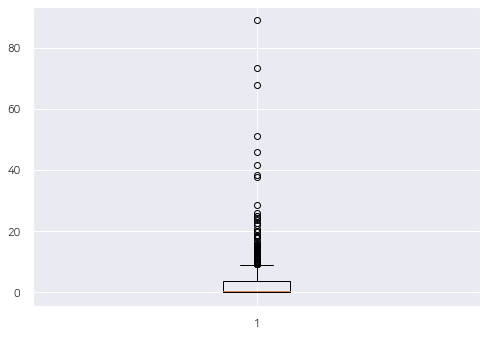

In [356]:
plt.boxplot(df_raw['CRIM'])

# TAX도 예측해보자

In [361]:
df_tax_600 = df_raw[df_raw['TAX']>600]
df_tax_0 = df_raw[df_raw['TAX']<600]

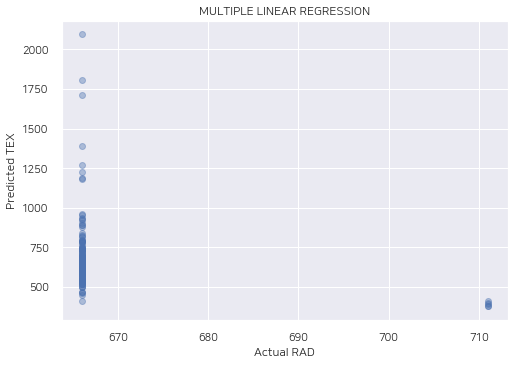

In [476]:

df_train_y = df_tax_0['TAX']
df_train_x = df_tax_0.drop(['AGE_CUT','DIS_CUT','index','Bk','MEDV_CUT','RAD_CUT','TAX'], axis = 1, inplace = False)

df_test_y = df_tax_600['TAX']
df_test_x = df_tax_600.drop(['AGE_CUT','DIS_CUT','index','Bk','MEDV_CUT','RAD_CUT','TAX'], axis = 1, inplace = False)

from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(df_train_x, df_train_y)
tax_predicted = mlr.predict(df_test_x)

plt.scatter(df_test_y, tex_predicted, alpha=0.4)
plt.xlabel("Actual RAD")
plt.ylabel("Predicted TEX")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()


In [360]:
df_raw

,index,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,...,PTRATIO,B,LSTAT,AGE_CUT,DIS_CUT,Bk,MEDV_CUT,RAD_CUT,TAX_CUT,RAD_edited
0,398,5.0,38.351799,0.0,18.10,0,0.693,5.453,100.000000,1.4896,...,20.200001,396.899994,30.590000,매우많음,최하,1.260000,0,1,1,6.601472
1,405,5.0,67.920799,0.0,18.10,0,0.693,5.683,100.000000,1.4254,...,20.200001,384.970001,22.980000,매우많음,최하,1.250460,0,1,1,6.052275
2,400,5.6,25.046101,0.0,18.10,0,0.693,5.987,100.000000,1.5888,...,20.200001,396.899994,26.770000,매우많음,최하,1.260000,0,1,1,6.572277
3,399,6.3,9.916550,0.0,18.10,0,0.693,5.852,77.800003,1.5004,...,20.200001,338.160004,29.969999,많음,최하,1.211515,0,1,1,7.002209
4,414,7.0,45.746101,0.0,18.10,0,0.693,4.519,100.000000,1.6582,...,20.200001,88.269997,36.980000,매우많음,최하,0.927103,0,1,1,5.803333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,369,50.0,5.669980,0.0,18.10,1,0.631,6.683,96.800003,1.3567,...,20.200001,375.329987,3.730000,매우많음,최하,1.242642,3,1,1,6.536035
502,257,50.0,0.611540,20.0,3.97,0,0.647,8.704,86.900002,1.8010,...,13.000000,389.700012,5.120000,많음,최하,1.254260,3,0,0,5.000000
503,267,50.0,0.578340,20.0,3.97,0,0.575,8.297,67.000000,2.4216,...,13.000000,384.540008,7.440000,적음,하,1.250113,3,0,0,5.000000
504,372,50.0,8.267250,0.0,18.10,1,0.668,5.875,89.599998,1.1296,...,20.200001,347.880005,8.880000,많음,최하,1.219814,3,1,1,5.113481


In [477]:
print(np.median(tax_predicted))
print(tax_predicted.mean())

644.361199274273
694.8318694695371


(array([31., 66., 26.,  6.,  3.,  2.,  0.,  1.,  1.,  1.]),
 array([ 378.39358231,  549.96165996,  721.52973761,  893.09781526,
        1064.66589291, 1236.23397056, 1407.80204821, 1579.37012585,
        1750.9382035 , 1922.50628115, 2094.0743588 ]),
 <a list of 10 Patch objects>)

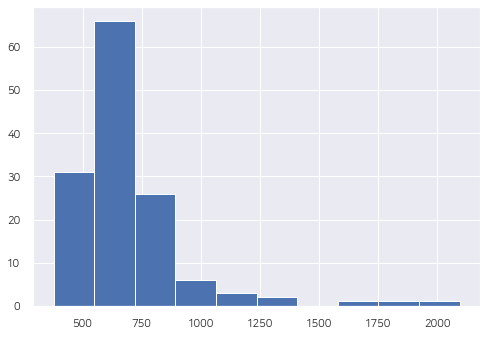

In [478]:
plt.hist(tax_predicted)

In [480]:
min(tax_predicted)

378.3935823145472

In [479]:
max(df_tax_0['TAX'])

469

# TAX 예측값이 너무 커서 그냥 원래 데이터의 최대값 + 표준편차 값으로 대체했다.

In [380]:
# loc써서 특정조건의 행에 값 넣기
# TAX_edited에 넣기
df_test_x['TAX_edited'] = rad_predicted
df_raw['TAX_edited'] = df_raw['TAX']
df_raw.loc[df_raw['TAX']>500, 'TAX_edited'] = max(df_tax_0['TAX']) + np.std(df_tax_0['TAX'])

(array([ 22.,  56.,  76.,  86.,  33.,  21.,  50.,  24.,   1., 137.]),
 array([187.        , 221.97363177, 256.94726354, 291.92089532,
        326.89452709, 361.86815886, 396.84179063, 431.8154224 ,
        466.78905418, 501.76268595, 536.73631772]),
 <a list of 10 Patch objects>)

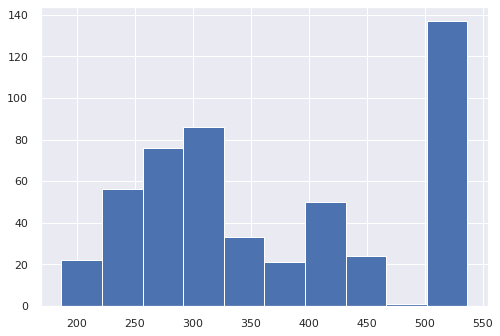

In [382]:
plt.hist(df_raw['TAX_edited'])

# 파생변수 생성
1) 내부요인  
- 집 자체 요인 : AGE, RM  

2) 외부요인  
- 환경 : CHAS, NOX  
- 교통입지 : DIS, RAD_edited  
- 소득, 교육 : LSTAT, PTRATIO, TAX_edited  
- 도시계획 : INDUS, ZN  

In [386]:
df_final = df_raw.drop(['index','AGE_CUT','DIS_CUT','Bk','MEDV_CUT','RAD_CUT','TAX_CUT'], axis = 1, inplace = False)

In [387]:
df_final

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,RAD_edited,TAX_edited
0,5.0,38.351799,0.0,18.10,0,0.693,5.453,100.000000,1.4896,24,666,20.200001,396.899994,30.590000,6.601472,536.736318
1,5.0,67.920799,0.0,18.10,0,0.693,5.683,100.000000,1.4254,24,666,20.200001,384.970001,22.980000,6.052275,536.736318
2,5.6,25.046101,0.0,18.10,0,0.693,5.987,100.000000,1.5888,24,666,20.200001,396.899994,26.770000,6.572277,536.736318
3,6.3,9.916550,0.0,18.10,0,0.693,5.852,77.800003,1.5004,24,666,20.200001,338.160004,29.969999,7.002209,536.736318
4,7.0,45.746101,0.0,18.10,0,0.693,4.519,100.000000,1.6582,24,666,20.200001,88.269997,36.980000,5.803333,536.736318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,50.0,5.669980,0.0,18.10,1,0.631,6.683,96.800003,1.3567,24,666,20.200001,375.329987,3.730000,6.536035,536.736318
502,50.0,0.611540,20.0,3.97,0,0.647,8.704,86.900002,1.8010,5,264,13.000000,389.700012,5.120000,5.000000,264.000000
503,50.0,0.578340,20.0,3.97,0,0.575,8.297,67.000000,2.4216,5,264,13.000000,384.540008,7.440000,5.000000,264.000000
504,50.0,8.267250,0.0,18.10,1,0.668,5.875,89.599998,1.1296,24,666,20.200001,347.880005,8.880000,5.113481,536.736318


In [388]:
# 2-sample-t test for CHAS discrete feature(0, 1) 
import scipy.stats as stats

t_result = stats.ttest_ind(df_raw[df_raw['CHAS'] == 0]['MEDV'],df_raw[df_raw['CHAS'] == 1]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature CHAS")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['CRIM'] > df_raw['CRIM'].median()]['MEDV'],
                           df_raw[df_raw['CRIM'] <= df_raw['CRIM'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature CRIM")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['ZN'] > df_raw['ZN'].median()]['MEDV'],
                           df_raw[df_raw['ZN'] <= df_raw['ZN'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature ZN")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['INDUS'] > df_raw['INDUS'].median()]['MEDV'],
                           df_raw[df_raw['INDUS'] <= df_raw['INDUS'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature INDUS")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['NOX'] > df_raw['NOX'].median()]['MEDV'],
                           df_raw[df_raw['NOX'] <= df_raw['NOX'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature NOX")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['RM'] > df_raw['RM'].median()]['MEDV'],
                           df_raw[df_raw['RM'] <= df_raw['RM'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature RM")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['AGE'] > df_raw['AGE'].median()]['MEDV'],
                           df_raw[df_raw['AGE'] <= df_raw['AGE'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature AGE")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['DIS'] > df_raw['DIS'].median()]['MEDV'],
                           df_raw[df_raw['DIS'] <= df_raw['DIS'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature DIS")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['RAD_edited'] > df_raw['RAD_edited'].median()]['MEDV'],
                           df_raw[df_raw['RAD_edited'] <= df_raw['RAD_edited'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature RAD_edited")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['RAD'] > df_raw['RAD'].median()]['MEDV'],
                           df_raw[df_raw['RAD'] <= df_raw['RAD'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature RAD")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['TAX'] > df_raw['TAX'].median()]['MEDV'],
                           df_raw[df_raw['TAX'] <= df_raw['TAX'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature TAX")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['PTRATIO'] > df_raw['PTRATIO'].median()]['MEDV'],
                           df_raw[df_raw['PTRATIO'] <= df_raw['PTRATIO'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature PTRATIO")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['B'] > df_raw['B'].median()]['MEDV'],
                           df_raw[df_raw['B'] <= df_raw['B'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature B")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['LSTAT'] > df_raw['LSTAT'].median()]['MEDV'],
                           df_raw[df_raw['LSTAT'] <= df_raw['LSTAT'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature LSTAT")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(df_raw[df_raw['TAX_edited'] > df_raw['TAX_edited'].median()]['MEDV'],
                           df_raw[df_raw['TAX_edited'] <= df_raw['TAX_edited'].median()]['MEDV']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature TAX_edited")
print("t : %.3f" %t)
print("p-value : %.3f" %p)

2 sample t-test for Feature CHAS
t : -3.996
p-value : 0.000
2 sample t-test for Feature CRIM
t : -6.120
p-value : 0.000
2 sample t-test for Feature ZN
t : 9.038
p-value : 0.000
2 sample t-test for Feature INDUS
t : -10.367
p-value : 0.000
2 sample t-test for Feature NOX
t : -8.454
p-value : 0.000
2 sample t-test for Feature RM
t : 12.046
p-value : 0.000
2 sample t-test for Feature AGE
t : -8.561
p-value : 0.000
2 sample t-test for Feature DIS
t : 6.362
p-value : 0.000
2 sample t-test for Feature RAD_edited
t : -5.820
p-value : 0.000
2 sample t-test for Feature RAD
t : -5.973
p-value : 0.000
2 sample t-test for Feature TAX
t : -9.213
p-value : 0.000
2 sample t-test for Feature PTRATIO
t : -12.328
p-value : 0.000
2 sample t-test for Feature B
t : 0.679
p-value : 0.497
2 sample t-test for Feature LSTAT
t : -18.565
p-value : 0.000
2 sample t-test for Feature TAX_edited
t : -9.213
p-value : 0.000


# 스케일링한 최종데이터랑 파생변수 만들기

In [392]:
df_final_x = df_final.drop('MEDV', axis = 1)
df_final_y = df_final['MEDV']


x_cols = df_final_x.columns
scaler = StandardScaler()

nd_scaled = scaler.fit_transform(df_final_x)
print("Scaled data : \n {}".format(nd_scaled[:5].round(3)))
print("Shape : \n {}".format(nd_scaled.shape))

Scaled data : 
 [[ 4.043 -0.488  1.016 -0.273  1.195 -1.185  1.117 -1.096  1.661  1.531
   0.807  0.441  2.514  1.041  1.42 ]
 [ 7.484 -0.488  1.016 -0.273  1.195 -0.857  1.117 -1.126  1.661  1.531
   0.807  0.31   1.448  0.706  1.42 ]
 [ 2.494 -0.488  1.016 -0.273  1.195 -0.424  1.117 -1.049  1.661  1.531
   0.807  0.441  1.979  1.023  1.42 ]
 [ 0.734 -0.488  1.016 -0.273  1.195 -0.616  0.328 -1.091  1.661  1.531
   0.807 -0.203  2.427  1.285  1.42 ]
 [ 4.903 -0.488  1.016 -0.273  1.195 -2.515  1.117 -1.016  1.661  1.531
   0.807 -2.943  3.41   0.554  1.42 ]]
Shape : 
 (506, 15)


In [393]:
df_final_scaled = pd.DataFrame(nd_scaled, columns = x_cols)
df_final_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,RAD_edited,TAX_edited
0,4.042605,-0.487722,1.015999,-0.272599,1.194724,-1.184795,1.117494,-1.095936,1.661245,1.530926,0.806576,0.441052,2.514288,1.040695,1.420241
1,7.483646,-0.487722,1.015999,-0.272599,1.194724,-0.857124,1.117494,-1.126455,1.661245,1.530926,0.806576,0.310247,1.447566,0.705977,1.420241
2,2.494178,-0.487722,1.015999,-0.272599,1.194724,-0.424027,1.117494,-1.048780,1.661245,1.530926,0.806576,0.441052,1.978825,1.022901,1.420241
3,0.733504,-0.487722,1.015999,-0.272599,1.194724,-0.616356,0.328050,-1.090802,1.661245,1.530926,0.806576,-0.202994,2.427380,1.284931,1.420241
4,4.903104,-0.487722,1.015999,-0.272599,1.194724,-2.515426,1.117494,-1.015789,1.661245,1.530926,0.806576,-2.942878,3.409999,0.554255,1.420241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.239316,-0.487722,1.015999,3.668398,0.659147,0.567535,1.003701,-1.159113,1.661245,1.530926,0.806576,0.204551,-1.250780,1.000813,1.420241
502,-0.349351,0.370669,-1.045700,-0.272599,0.797361,3.446771,0.651651,-0.947906,-0.523001,-0.856665,-2.522434,0.362109,-1.055938,0.064650,-0.942492
503,-0.353214,0.370669,-1.045700,-0.272599,0.175401,2.866934,-0.056004,-0.652892,-0.523001,-0.856665,-2.522434,0.305533,-0.730735,0.064650,-0.942492
504,0.541569,-0.487722,1.015999,3.668398,0.978765,-0.583589,0.747664,-1.267069,1.661245,1.530926,0.806576,-0.096421,-0.528885,0.133813,1.420241


In [454]:
df_final_scaled['MEDV'] = df_final['MEDV']

## 파생변수생성

In [394]:
df_final_scaled['inner_factors'] = (-8.561) * df_final_scaled['AGE'] + 12.046 * df_final_scaled['RM']
df_final_scaled['environment'] = (-3.996) * df_final_scaled['CHAS'] - 8.454 * df_final_scaled['NOX']
df_final_scaled['location'] = 6.362 * df_final_scaled['DIS'] - 5.820 * df_final_scaled['RAD_edited']
df_final_scaled['earn_edu'] = (-18.565) * df_final_scaled['LSTAT'] - 12.328 * df_final_scaled['PTRATIO'] - 9.213 * df_final_scaled['TAX_edited']
df_final_scaled['city_plan'] = 9.038 * df_final_scaled['ZN'] - 10.367 * df_final_scaled['INDUS']

In [455]:
df_final_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,B,LSTAT,RAD_edited,TAX_edited,inner_factors,environment,location,earn_edu,city_plan,MEDV
0,4.042605,-0.487722,1.015999,-0.272599,1.194724,-1.184795,1.117494,-1.095936,1.661245,1.530926,...,0.441052,2.514288,1.040695,1.420241,-23.838911,-9.010892,-13.029190,-69.705916,-14.940897,5.0
1,7.483646,-0.487722,1.015999,-0.272599,1.194724,-0.857124,1.117494,-1.126455,1.661245,1.530926,...,0.310247,1.447566,0.705977,1.420241,-19.891780,-9.010892,-11.275293,-49.902211,-14.940897,5.0
2,2.494178,-0.487722,1.015999,-0.272599,1.194724,-0.424027,1.117494,-1.048780,1.661245,1.530926,...,0.441052,1.978825,1.022901,1.420241,-14.674705,-9.010892,-12.625621,-59.765030,-14.940897,5.6
3,0.733504,-0.487722,1.015999,-0.272599,1.194724,-0.616356,0.328050,-1.090802,1.661245,1.530926,...,-0.202994,2.427380,1.284931,1.420241,-10.233059,-9.010892,-14.417980,-68.092471,-14.940897,6.3
4,4.903104,-0.487722,1.015999,-0.272599,1.194724,-2.515426,1.117494,-1.015789,1.661245,1.530926,...,-2.942878,3.409999,0.554255,1.420241,-39.867695,-9.010892,-9.688214,-86.334779,-14.940897,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.239316,-0.487722,1.015999,3.668398,0.659147,0.567535,1.003701,-1.159113,1.661245,1.530926,...,0.204551,-1.250780,1.000813,1.420241,-1.756154,-20.231347,-13.199006,0.192569,-14.940897,50.0
502,-0.349351,0.370669,-1.045700,-0.272599,0.797361,3.446771,0.651651,-0.947906,-0.523001,-0.856665,...,0.362109,-1.055938,0.064650,-0.942492,35.941017,-5.651583,-6.406844,59.383230,14.190878,50.0
503,-0.353214,0.370669,-1.045700,-0.272599,0.175401,2.866934,-0.056004,-0.652892,-0.523001,-0.856665,...,0.305533,-0.730735,0.064650,-0.942492,35.014540,-0.393533,-4.529964,53.345833,14.190878,50.0
504,0.541569,-0.487722,1.015999,3.668398,0.978765,-0.583589,0.747664,-1.267069,1.661245,1.530926,...,-0.096421,-0.528885,0.133813,1.420241,-13.430671,-22.933400,-8.839884,-13.209412,-14.940897,50.0


In [457]:
df_final_scaled.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'RAD_edited', 'TAX_edited', 'inner_factors',
       'environment', 'location', 'earn_edu', 'city_plan', 'MEDV'],
      dtype='object')

In [456]:
df_raw_y = df_final_y
df_raw_x = df_final_scaled.drop('MEDV', axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_x.shape))

train data X size : (354, 20)
train data Y size : (354,)
test data X size : (152, 20)
test data Y size : (152, 20)


# 랜덤포레스트

In [397]:
rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))


Score on training set : 0.973
Score on test set : 0.898


In [399]:
train_score = []; test_score = []

para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n['n_estimator'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score
df_score_n.round(3)

,n_estimator,TrainScore,TestScore
0,10,0.973,0.898
1,20,0.978,0.901
2,30,0.979,0.903
3,40,0.980,0.903
4,50,0.980,0.901
5,60,0.981,0.900
6,70,0.981,0.901
7,80,0.982,0.902
8,90,0.981,0.903
9,100,0.981,0.904


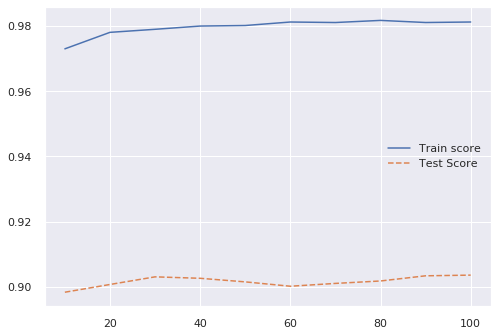

In [400]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.legend()


In [402]:
train_score = []; test_score = [];

para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state = 1234,
                              n_estimators = 30,
                              min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.979,0.903
1,2,0.966,0.899
2,3,0.949,0.891
3,4,0.932,0.893
4,5,0.916,0.895
5,6,0.907,0.891
6,7,0.895,0.887
7,8,0.884,0.882
8,9,0.876,0.875
9,10,0.870,0.873


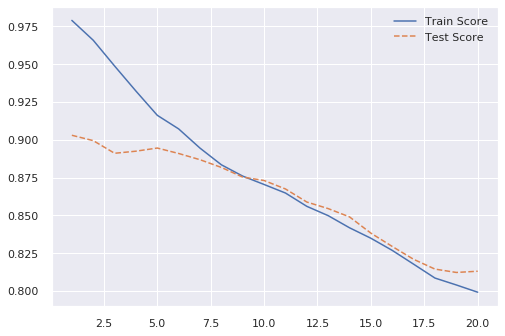

In [403]:
plt.plot(para_leaf, train_score, linestyle = "-", label  = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label  = "Test Score")
plt.legend()

In [404]:
train_score = []; test_score = [];

para_split = [n_split * 2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state = 1234,
                              n_estimators = 30,
                              min_samples_leaf = 5,
                              min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.916,0.895
1,6,0.916,0.895
2,8,0.916,0.895
3,10,0.916,0.895
4,12,0.913,0.893
5,14,0.908,0.893
6,16,0.904,0.892
7,18,0.901,0.891
8,20,0.898,0.888
9,22,0.895,0.886


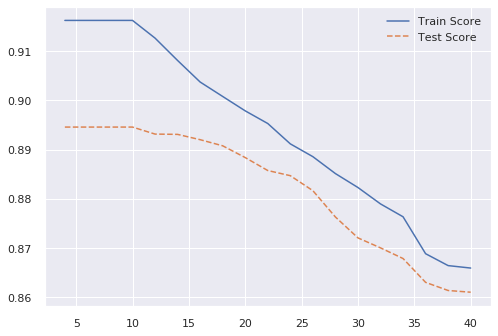

In [405]:
plt.plot(para_split, train_score, linestyle = "-", label  = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label  = "Test Score")
plt.legend()

In [407]:
train_score = []; test_score = [];

para_depth = [n_depth for n_depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state = 1234,
                              n_estimators = 30,
                              min_samples_leaf = 5,
                              min_samples_split = 10,
                              max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['MinSamplesSplit'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score
df_score_depth.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,1,0.592,0.576
1,2,0.784,0.834
2,3,0.861,0.871
3,4,0.890,0.882
4,5,0.905,0.890
5,6,0.912,0.892
6,7,0.915,0.893
7,8,0.915,0.893
8,9,0.916,0.894
9,10,0.916,0.895


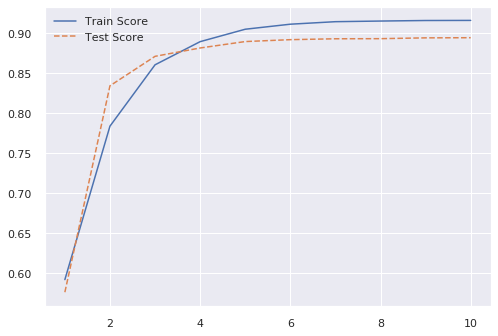

In [408]:
plt.plot(para_depth, train_score, linestyle = "-", label  = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label  = "Test Score")
plt.legend()

In [409]:
rf_final = RandomForestRegressor(random_state = 1234,
                                n_estimators = 30,
                                min_samples_leaf = 5,
                                min_samples_split = 10,
                                max_depth = 4)
rf_final.fit(df_train_x, df_train_y)
print("score on training set : {}".format(rf_final.score(df_train_x, df_train_y)))
print("score on test set : {}".format(rf_final.score(df_test_x, df_test_y)))

score on training set : 0.8896884969403791
score on test set : 0.8817714781323275


Text(0, 0.5, '변수')

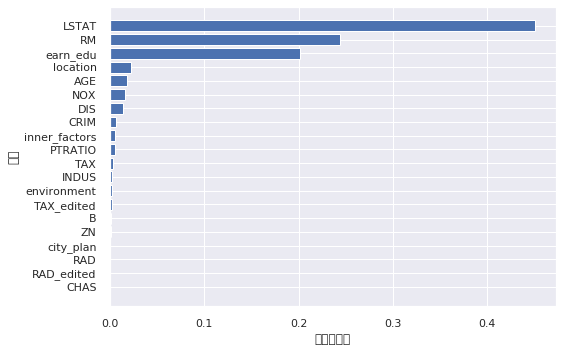

In [410]:
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수중요도")
plt.ylabel("변수")

# 그레디언트 부스팅

In [411]:
rf_uncustomized = GradientBoostingRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))


Score on training set : 0.983
Score on test set : 0.913


In [412]:
train_score = []; test_score = []

para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = GradientBoostingRegressor(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n['n_estimator'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

df_score_n.round(3)

,n_estimator,TrainScore,TestScore
0,10,0.774,0.744
1,20,0.911,0.863
2,30,0.943,0.894
3,40,0.958,0.904
4,50,0.967,0.909
5,60,0.972,0.911
6,70,0.975,0.912
7,80,0.978,0.912
8,90,0.981,0.914
9,100,0.983,0.913


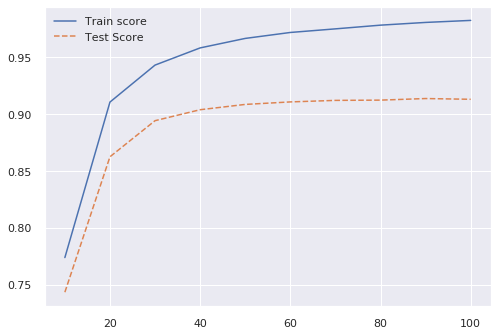

In [413]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.legend()


In [414]:
train_score = []; test_score = [];

para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = GradientBoostingRegressor(random_state = 1234,
                              n_estimators = 60,
                              min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.972,0.911
1,2,0.971,0.915
2,3,0.967,0.910
3,4,0.965,0.906
4,5,0.965,0.901
5,6,0.962,0.902
6,7,0.959,0.901
7,8,0.959,0.903
8,9,0.956,0.891
9,10,0.953,0.897


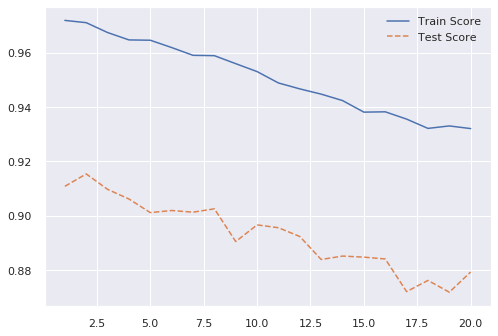

In [415]:
plt.plot(para_leaf, train_score, linestyle = "-", label  = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label  = "Test Score")
plt.legend()

In [417]:
train_score = []; test_score = [];

para_split = [n_split * 2 for n_split in range(1,21)]

for v_min_samples_split in para_split:
    rf = GradientBoostingRegressor(random_state = 1234,
                              n_estimators = 60,
                              min_samples_leaf = 8,
                              min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.959,0.903
1,4,0.959,0.903
2,6,0.959,0.903
3,8,0.959,0.903
4,10,0.959,0.903
5,12,0.959,0.903
6,14,0.959,0.903
7,16,0.959,0.903
8,18,0.956,0.896
9,20,0.957,0.898


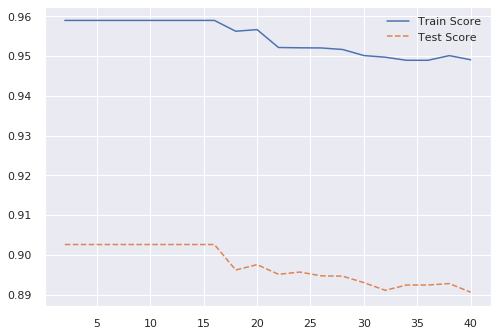

In [418]:
plt.plot(para_split, train_score, linestyle = "-", label  = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label  = "Test Score")
plt.legend()

In [419]:
train_score = []; test_score = [];

para_depth = [n_depth for n_depth in range(1,11)]

for v_max_depth in para_depth:
    rf = GradientBoostingRegressor(random_state = 1234,
                              n_estimators = 60,
                              min_samples_leaf = 8,
                              min_samples_split = 16,
                              max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['MinSamplesSplit'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

df_score_depth.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,1,0.843,0.843
1,2,0.925,0.877
2,3,0.959,0.903
3,4,0.974,0.896
4,5,0.986,0.902
5,6,0.989,0.893
6,7,0.992,0.894
7,8,0.993,0.889
8,9,0.993,0.890
9,10,0.994,0.893


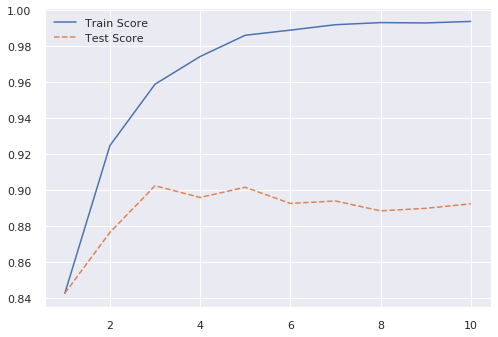

In [420]:
plt.plot(para_depth, train_score, linestyle = "-", label  = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label  = "Test Score")
plt.legend()

In [421]:
train_score = []; test_score = [];

para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    rf = GradientBoostingRegressor(random_state = 1234,
                              n_estimators = 60,
                              min_samples_leaf = 8,
                              min_samples_split = 16,
                              max_depth = 5,
                              learning_rate = v_learning_rate)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_lr = pd.DataFrame()
df_score_lr['MinSamplesSplit'] = para_lr
df_score_lr['TrainScore'] = train_score
df_score_lr['TestScore'] = test_score

df_score_lr.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,0.1,0.986,0.902
1,0.2,0.995,0.894
2,0.3,0.998,0.882
3,0.4,0.999,0.862
4,0.5,1.000,0.852
5,0.6,1.000,0.817
6,0.7,1.000,0.816
7,0.8,1.000,0.782
8,0.9,1.000,0.758


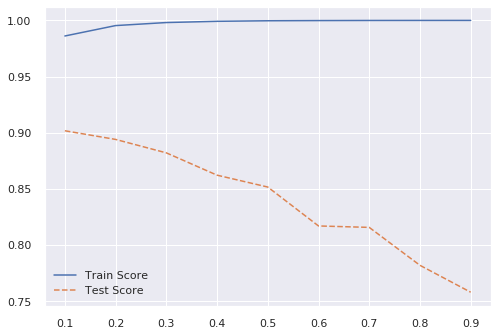

In [422]:
plt.plot(para_lr, train_score, linestyle = "-", label  = "Train Score")
plt.plot(para_lr, test_score, linestyle = "--", label  = "Test Score")
plt.legend()

In [434]:
gb_final = GradientBoostingRegressor(random_state = 1234,
                                n_estimators = 60,
                                min_samples_leaf = 5,
                                min_samples_split = 20,
                                max_depth = 5,
                                learning_rate = 0.1)
gb_final.fit(df_train_x, df_train_y)
print("score on training set : {}".format(gb_final.score(df_train_x, df_train_y)))
print("score on test set : {}".format(gb_final.score(df_test_x, df_test_y)))

score on training set : 0.9872859247621256
score on test set : 0.915649896568127


Text(0, 0.5, '변수')

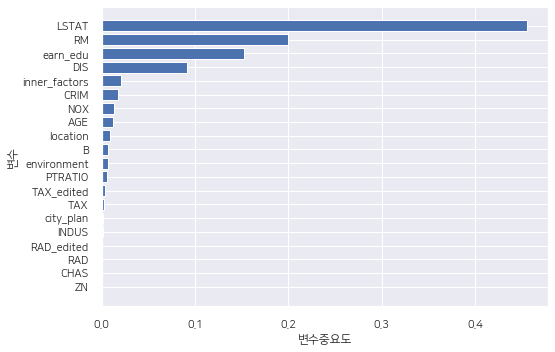

In [438]:
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수중요도")
plt.ylabel("변수")

# 의사결정나무

In [439]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)
# training data 설명력
print("Score on training set : {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test data 설명력
print("Score on test set : {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))


Score on training set : 1.000
Score on test set : 0.785


In [440]:
# train, test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_leaf : 잎사귀 최소 자료 수??
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234,
                                min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score
df_score_leaf.round(3)


,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.785
1,2,0.985,0.778
2,3,0.971,0.786
3,4,0.959,0.799
4,5,0.944,0.820
5,6,0.925,0.801
6,7,0.895,0.711
7,8,0.884,0.742
8,9,0.878,0.747
9,10,0.873,0.764


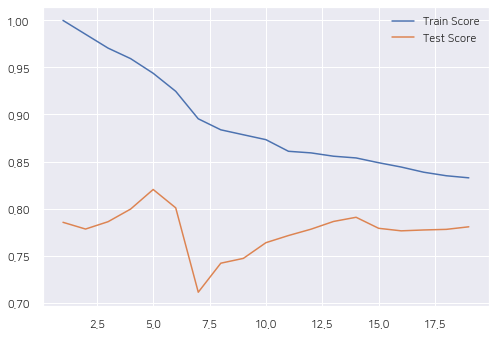

In [441]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "-", label = "Test Score")
plt.legend()
plt.show()

In [446]:
test_score = []; train_score = []
para_split = [n_split * 4 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state = 1234,
                                 min_samples_leaf = 5,
                                 min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split['MinSampleSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
df_score_split.round(3)


,MinSampleSplit,TrainScore,TestScore
0,8,0.944,0.820
1,12,0.940,0.816
2,16,0.935,0.816
3,20,0.932,0.822
4,24,0.918,0.820
5,28,0.912,0.829
6,32,0.908,0.825
7,36,0.903,0.821
8,40,0.900,0.826
9,44,0.880,0.817


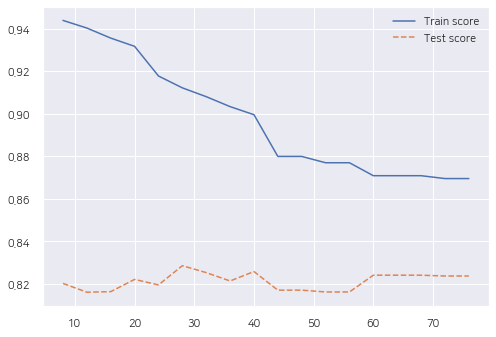

In [447]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test score")
plt.legend()

In [448]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth : 최대 깊이 변경
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state = 1234,
                                min_samples_leaf = 5,
                                min_samples_split = 28,
                                max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.464,0.369
1,2,0.691,0.757
2,3,0.789,0.797
3,4,0.871,0.824
4,5,0.895,0.835
5,6,0.905,0.816
6,7,0.911,0.825
7,8,0.912,0.829
8,9,0.912,0.829
9,10,0.912,0.829


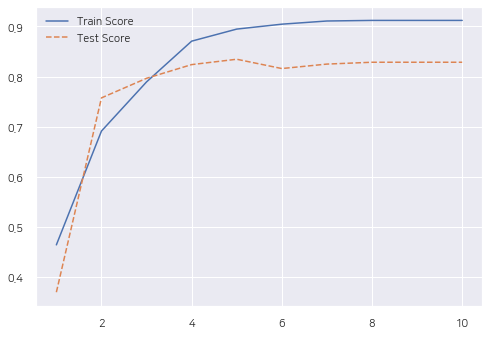

In [449]:
# p 178
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.legend()

In [450]:
tree_final = DecisionTreeRegressor(min_samples_leaf = 5,
                                  min_samples_split = 28,
                                  max_depth = 5,
                                  random_state = 1234)
tree_final.fit(df_train_x, df_train_y)
print("score on training set : {}".format(tree_final.score(df_train_x, df_train_y)))
print("score on test set : {}".format(tree_final.score(df_test_x, df_test_y)))

score on training set : 0.8947905604316784
score on test set : 0.8345767967513666


In [451]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
12,LSTAT,0.525
5,RM,0.269
18,earn_edu,0.095
7,DIS,0.089
4,NOX,0.011
6,AGE,0.005
0,CRIM,0.004
15,inner_factors,0.002
17,location,0.000
16,environment,0.000


Text(0, 0.5, '변수')

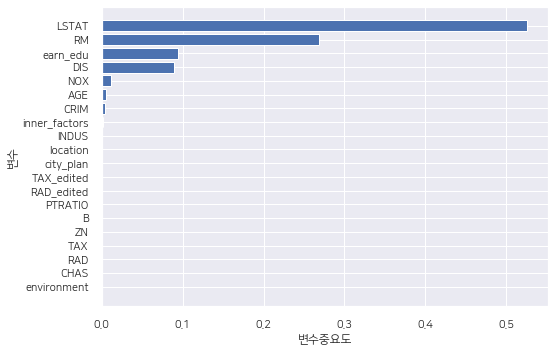

In [452]:
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수중요도")
plt.ylabel("변수")

# 최종 모델평가

In [453]:
import statsmodels.formula.api as smf

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true))

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse


In [487]:
lr_model = smf.ols(formula = "MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD_edited + TAX_edited + B + LSTAT + PTRATIO + inner_factors + environment + location + earn_edu + city_plan", data = df_final_scaled)
lr_result = lr_model.fit()
print(lr_result.summary())

dt_model = DecisionTreeRegressor(random_state = 1234,
                                min_samples_leaf = 5,
                                min_samples_split = 28,
                                max_depth = 5)
dt_model.fit(df_train_x, df_train_y)

rf_model = RandomForestRegressor(random_state = 1234,
                                n_estimators = 30,
                                min_samples_leaf = 5,
                                min_samples_split = 10,
                                max_depth = 4)
rf_model.fit(df_train_x, df_train_y)

gb_model = GradientBoostingRegressor(random_state = 1234,
                                    n_estimators = 60,
                                    min_samples_leaf = 5,
                                    min_samples_split = 20,
                                    max_depth = 5,
                                    learning_rate = 0.1)
gb_model.fit(df_train_x, df_train_y)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     102.9
Date:                Sun, 09 Feb 2020   Prob (F-statistic):          4.47e-131
Time:                        05:07:43   Log-Likelihood:                -1507.9
No. Observations:                 506   AIC:                             3044.
Df Residuals:                     492   BIC:                             3103.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        22.5328      0.215    104.905

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=20,
                          min_weight_fraction_leaf=0.0, n_estimators=60,
                          n_iter_no_change=None, presort='auto',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [488]:
df_raw_x = df_final_scaled.drop('MEDV', axis = 1)
df_raw_x_const = add_constant(df_raw_x)
df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]

df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

,variable,VIF
0,const,1.000
12,B,1.355
1,CRIM,1.797
9,RAD,16.269
10,TAX,117.989
5,NOX,inf
6,RM,inf
7,AGE,inf
8,DIS,inf
3,INDUS,inf


In [481]:
lr_model = smf.ols(formula = "MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD_edited + TAX_edited + B + LSTAT + inner_factors + environment + location + earn_edu + city_plan", data = df_final_scaled)
lr_result = lr_model.fit()
print(lr_result.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     102.9
Date:                Sun, 09 Feb 2020   Prob (F-statistic):          4.47e-131
Time:                        04:58:14   Log-Likelihood:                -1507.9
No. Observations:                 506   AIC:                             3044.
Df Residuals:                     492   BIC:                             3103.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        22.5328      0.215    104.905

In [482]:
lr_model = smf.ols(formula = "MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD_edited + B + LSTAT + inner_factors + environment + location + earn_edu + city_plan", data = df_final_scaled)
lr_result = lr_model.fit()
print(lr_result.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     110.9
Date:                Sun, 09 Feb 2020   Prob (F-statistic):          1.62e-131
Time:                        04:58:38   Log-Likelihood:                -1509.3
No. Observations:                 506   AIC:                             3045.
Df Residuals:                     493   BIC:                             3100.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        22.5328      0.215    104.719

In [483]:
lr_model = smf.ols(formula = "MEDV ~ ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD_edited + B + LSTAT + inner_factors + environment + location + earn_edu + city_plan", data = df_final_scaled)
lr_result = lr_model.fit()
print(lr_result.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     120.2
Date:                Sun, 09 Feb 2020   Prob (F-statistic):          6.58e-132
Time:                        04:59:36   Log-Likelihood:                -1510.9
No. Observations:                 506   AIC:                             3046.
Df Residuals:                     494   BIC:                             3097.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        22.5328      0.216    104.500

In [484]:
lr_model = smf.ols(formula = "MEDV ~ ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD_edited + B + LSTAT + inner_factors + environment + location + earn_edu", data = df_final_scaled)
lr_result = lr_model.fit()
print(lr_result.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     120.2
Date:                Sun, 09 Feb 2020   Prob (F-statistic):          6.58e-132
Time:                        05:00:06   Log-Likelihood:                -1510.9
No. Observations:                 506   AIC:                             3046.
Df Residuals:                     494   BIC:                             3097.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        22.5328      0.216    104.500

In [485]:
lr_model = smf.ols(formula = "MEDV ~ ZN + CHAS + NOX + RM + AGE + DIS + RAD_edited + B + LSTAT + inner_factors + environment + location + earn_edu", data = df_final_scaled)
lr_result = lr_model.fit()
print(lr_result.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     132.4
Date:                Sun, 09 Feb 2020   Prob (F-statistic):          5.92e-133
Time:                        05:00:26   Log-Likelihood:                -1511.0
No. Observations:                 506   AIC:                             3044.
Df Residuals:                     495   BIC:                             3090.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        22.5328      0.215    104.593

In [486]:
df_raw_x = df_final_scaled.drop(['MEDV','PTRATIO','CRIM','INDUS','TAX_edited','city_plan'], axis = 1)
df_raw_x_const = add_constant(df_raw_x)
df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]

df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

,variable,VIF
0,const,1.000
9,B,1.333
1,ZN,2.328
10,LSTAT,7.258
7,RAD,7.355
8,TAX,9.769
15,earn_edu,12.300
2,CHAS,inf
3,NOX,inf
4,RM,inf


(0.8888276219367981, 1.2044658583470126e-18)


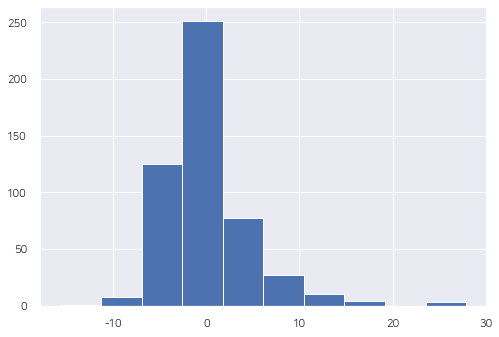

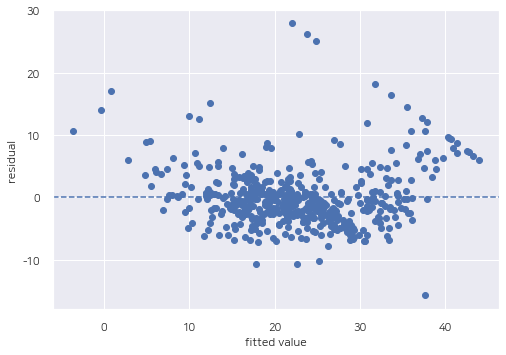

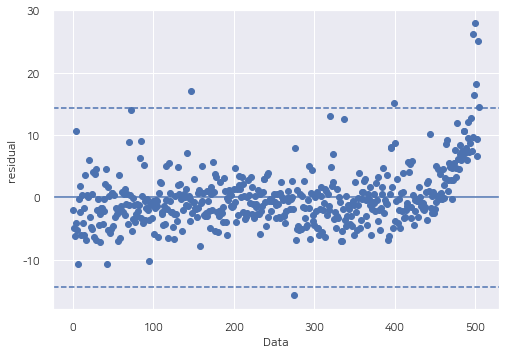

1.229747086073813


In [490]:
result = lr_result
from scipy.stats import shapiro

# 정규성검정
plt.hist(result.resid)
print(shapiro(result.resid))
plt.show()

# 등분산성 검정
plt.scatter(result.fittedvalues, result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")
plt.show()

# 독립성 검정
plt.scatter(range(0,506), result.resid, marker = "o")
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "-")
plt.axhline(y = 3 * np.std(result.resid), linestyle = "--")
plt.axhline(y = - 3 * np.std(result.resid), linestyle = "--")
plt.show()
# 더빈왓슨 통계량
from statsmodels.stats.stattools import durbin_watson
print(durbin_watson(result.resid))

In [459]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

models = ["회귀분석","의사결정나무","랜덤 포레스트","그래디언트 부스팅"]
mse, rmse, mae, mape = [],[],[],[]
# 회귀분석
lr_y_pred = lr_result.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))
# 의사결정나무
dt_y_pred = dt_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))
# 랜덤포레스트
rf_y_pred = rf_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))
# 그레디언트 부스팅
gb_y_pred = gb_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

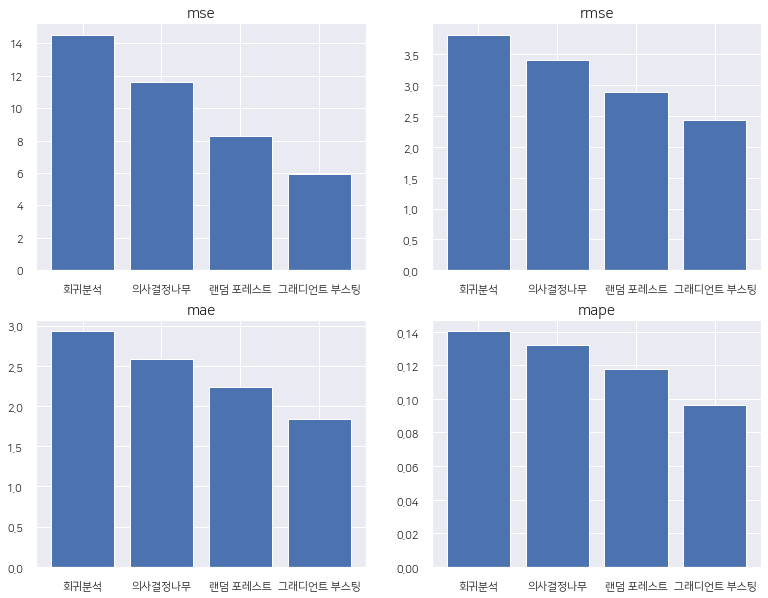

In [460]:
fig, ax = plt.subplots(2,2,figsize = (13,10))
ax[0,0].bar(models, mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models, rmse)
ax[0,1].set_title("rmse").set_fontsize(15)

ax[1,0].bar(models, mae)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models, mape)
ax[1,1].set_title("mape").set_fontsize(15)

# 원래데이터 오차분석

In [467]:
df_raw_y = df_raw['MEDV']
df_raw_x = df_raw.drop('MEDV', axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (354, 13)
train data Y size : (354,)
test data X size : (152, 13)
test data Y size : (152,)


In [468]:
reg_model = smf.ols(formula = "MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

dt_model = DecisionTreeRegressor(random_state = 1234,
                                min_samples_leaf = 6,
                                min_samples_split = 10,
                                max_depth = 4)
dt_model.fit(df_train_x, df_train_y)

rf_model = RandomForestRegressor(random_state = 1234,
                                n_estimators = 20,
                                min_samples_leaf = 6,
                                min_samples_split = 14,
                                max_depth = 4)
rf_model.fit(df_train_x, df_train_y)

gb_model = GradientBoostingRegressor(random_state = 1234,
                                    n_estimators = 40,
                                    min_samples_leaf = 6,
                                    min_samples_split = 12,
                                    max_depth = 6,
                                    learning_rate = 0.2)
gb_model.fit(df_train_x, df_train_y)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 08 Feb 2020   Prob (F-statistic):          6.72e-135
Time:                        22:41:57   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.2, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=12,
                          min_weight_fraction_leaf=0.0, n_estimators=40,
                          n_iter_no_change=None, presort='auto',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [489]:
reg_model = smf.ols(formula = "MEDV ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sun, 09 Feb 2020   Prob (F-statistic):          5.54e-137
Time:                        05:11:06   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.0

In [469]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

models = ["회귀분석","의사결정나무","랜덤 포레스트","그래디언트 부스팅"]
mse, rmse, mae, mape = [],[],[],[]
# 회귀분석
lr_y_pred = lr_result.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))
# 의사결정나무
dt_y_pred = dt_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))
# 랜덤포레스트
rf_y_pred = rf_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))
# 그레디언트 부스팅
gb_y_pred = gb_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'RAD_edited' is not defined
    MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD_edited + TAX_edited + B + LSTAT + PTRATIO + inner_factors + environment + location + earn_edu + city_plan
                                                             ^^^^^^^^^^

In [ ]:
fig, ax = plt.subplots(2,2,figsize = (13,10))
ax[0,0].bar(models, mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models, rmse)
ax[0,1].set_title("rmse").set_fontsize(15)

ax[1,0].bar(models, mae)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models, mape)
ax[1,1].set_title("mape").set_fontsize(15)

In [470]:
# 의사결정나무와 랜덤포레스트, 그레디언트 부스팅 모델 성능 결과 데이터프레임 만들기
pre_df = pd.DataFrame({'Decision_Tree' : [0.868,0.824], 'Random_Forest' : [0.870, 0.865], 'Gradient_boosting' : [0.995,0.906]}, index = ['train','test'])
after_df = pd.DataFrame({'Decision_Tree' : [0.895,0.835], 'Random_Forest' : [0.889,0.882], 'Gradient_boosting' : [0.987,0.916]}, index = ['train','test'])

In [471]:
pre_df

,Decision_Tree,Random_Forest,Gradient_boosting
train,0.868,0.870,0.995
test,0.824,0.865,0.906


In [472]:
after_df

,Decision_Tree,Random_Forest,Gradient_boosting
train,0.895,0.889,0.987
test,0.835,0.882,0.916
